<a href="https://colab.research.google.com/github/isoomni/bitcoin_twitter/blob/master/BTC_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,6)
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
df_smt = pd.read_csv('/content/drive/MyDrive/BTC_tweets_smt_1.csv')
df_smt.head()

,Unnamed: 0,date,timestamp,polarity,subjectivity
0,0,2014-09-17,2014-09-17 16:04:42+00,0.0,0.000000
1,1,2014-09-17,2014-09-17 22:11:57+00,0.0,0.066667
2,2,2014-09-17,2014-09-17 22:01:34+00,0.0,0.066667
3,3,2014-09-17,2014-09-17 16:00:05+00,0.0,0.400000
4,4,2014-09-17,2014-09-17 22:00:05+00,0.0,0.400000


In [ ]:
df_smt = df_smt.drop(columns='Unnamed: 0')
df_smt.head()

,date,timestamp,polarity,subjectivity
0,2014-09-17,2014-09-17 16:04:42+00,0.0,0.000000
1,2014-09-17,2014-09-17 22:11:57+00,0.0,0.066667
2,2014-09-17,2014-09-17 22:01:34+00,0.0,0.066667
3,2014-09-17,2014-09-17 16:00:05+00,0.0,0.400000
4,2014-09-17,2014-09-17 22:00:05+00,0.0,0.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2576 non-null   object 
 1   Open       2572 non-null   float64
 2   High       2572 non-null   float64
 3   Low        2572 non-null   float64
 4   Close      2572 non-null   float64
 5   Adj Close  2572 non-null   float64
 6   Volume     2572 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.0+ KB


In [ ]:
df_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280101 entries, 0 to 14280100
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   timestamp     object 
 2   polarity      float64
 3   subjectivity  float64
dtypes: float64(2), object(2)
memory usage: 435.8+ MB


In [ ]:
df_smt.date.iloc[-1]

'2019-11-23'

In [ ]:
df[df.Date == '2019-11-23']

,Date,Open,High,Low,Close,Adj Close,Volume
1893,2019-11-23,7296.164551,7442.258789,7151.417969,7397.796875,7397.796875,2.100892e+10


In [ ]:
raw = df.drop(range(1894, df.index[-1]+1))
raw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1889,2019-11-19,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,2.108361e+10
1890,2019-11-20,8203.613281,8237.240234,8010.511719,8027.268066,8027.268066,2.076430e+10
1891,2019-11-21,8023.644531,8110.098145,7597.381836,7642.750000,7642.750000,2.251424e+10
1892,2019-11-22,7643.569336,7697.382813,6936.706543,7296.577637,7296.577637,3.424232e+10
1893,2019-11-23,7296.164551,7442.258789,7151.417969,7397.796875,7397.796875,2.100892e+10


In [ ]:
raw.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#raw.Date

In [ ]:
#raw[raw.Open.isnull()]

In [ ]:
#raw[raw.Date=='2020-04-16']

In [ ]:
#bitcoin 가격 채우기
#https://coinmarketcap.com/ko/currencies/bitcoin/historical-data/

#raw.iloc[2039] = ['2020-04-17', 7116.55, 7167.18, 7050.33, 7096.18, 7096.18, 3.251342e+10]
#raw.iloc[2214] = ['2020-10-09', 11059.14, 11442.21, 11056.94, 11296.36, 11296.36, 2.287797e+10]
#raw.iloc[2217] = ['2020-10-12', 11392.64, 11698.47, 11240.69, 11555.36, 11555.36, 2.616397e+10]
#raw.iloc[2218] = ['2020-10-13', 11548.72, 11548.98, 11321.22, 11425.90, 11425.90, 2.424142e+10]

#print(raw.iloc[2039])
#print(raw.iloc[2214])
#print(raw.iloc[2217])
#print(raw.iloc[2218])

In [ ]:
#raw.Date = pd.to_datetime(raw.Date)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = raw.Date, y = raw.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = raw.Date, y = raw.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = raw.Date, y = raw.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = raw.Date, y = raw.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = raw.Date, y = raw.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='BTC price history',
    titlefont_size = 20,
    
    xaxis = dict(
        title='Date',
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Price USD',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [ ]:
train_df = raw.Close
train_df.index = raw.Date
train_df

Date
2014-09-17     457.334015
2014-09-18     424.440002
2014-09-19     394.795990
2014-09-20     408.903992
2014-09-21     398.821014
                 ...     
2019-11-19    8206.145508
2019-11-20    8027.268066
2019-11-21    7642.750000
2019-11-22    7296.577637
2019-11-23    7397.796875
Name: Close, Length: 1894, dtype: float64

정상 시계열로 변환

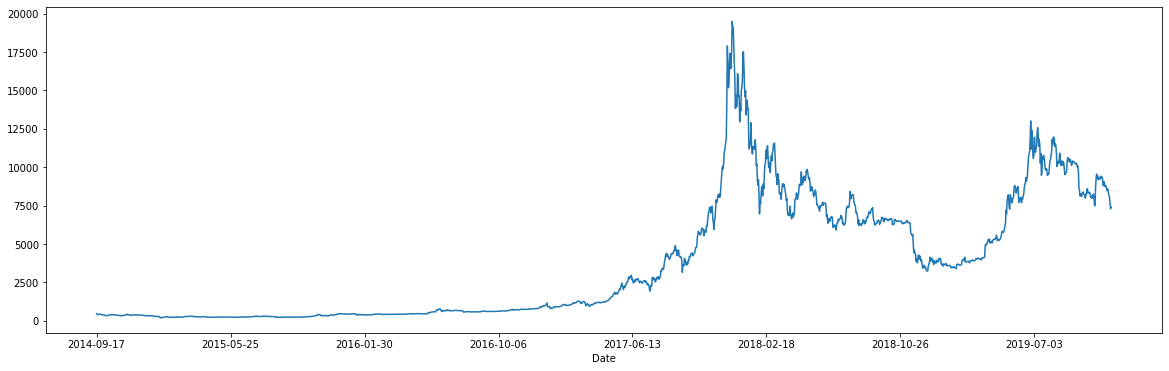

In [ ]:
train_df.plot()
plt.show()

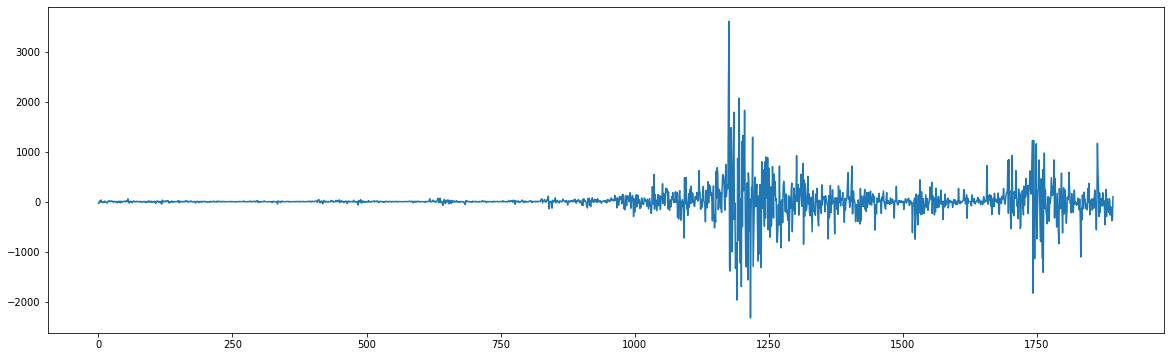

In [ ]:
diff_1 = np.diff(train_df)
plt.plot(diff_1)
plt.show()

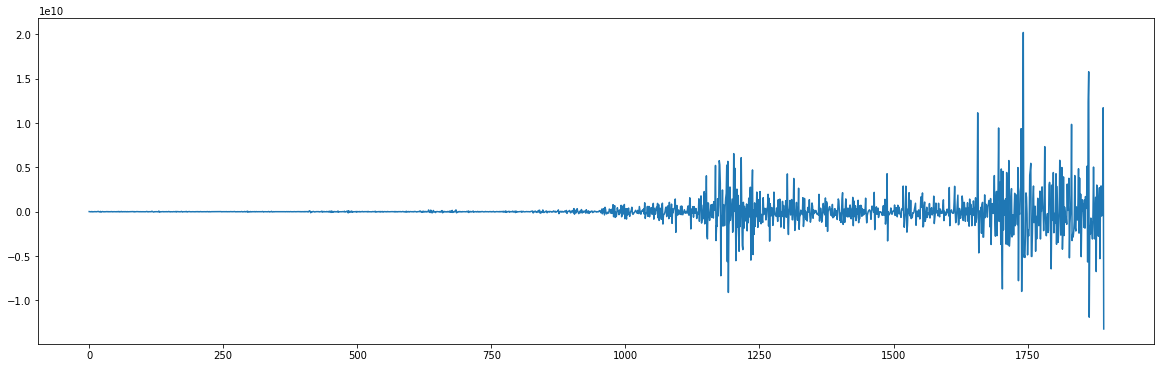

In [ ]:
diff_Volume = np.diff(raw.Volume)
plt.plot(diff_Volume)
plt.show()

In [ ]:
#정상성 만족 확인
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff_1[1:])
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ADF Statistic: -8.289775
p-value: 0.000000


=> diff_1은 정상성 만족한다

tweets 감정분석 시계열

In [ ]:
df_smt_ext = df_smt.drop(columns='timestamp').groupby(by='date').mean()
df_smt_ext.head()

,polarity,subjectivity
date,,
2014-09-17,0.018873,0.174188
2014-09-18,0.019552,0.184710
2014-09-19,0.008737,0.186219
2014-09-20,0.018103,0.172069
2014-09-21,0.009293,0.178290


In [ ]:
df_smt_ext.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 2014-09-17 to 2019-11-23
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polarity      1894 non-null   float64
 1   subjectivity  1894 non-null   float64
dtypes: float64(2)
memory usage: 44.4+ KB


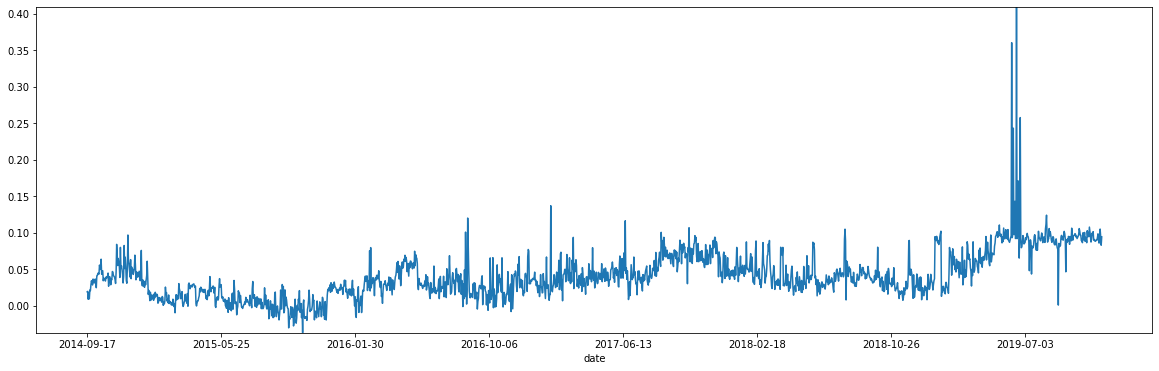

In [ ]:
df_smt_ext['polarity'].plot()
plt.ylim([df_smt_ext['polarity'].min(), df_smt_ext['polarity'].max()])
plt.show()

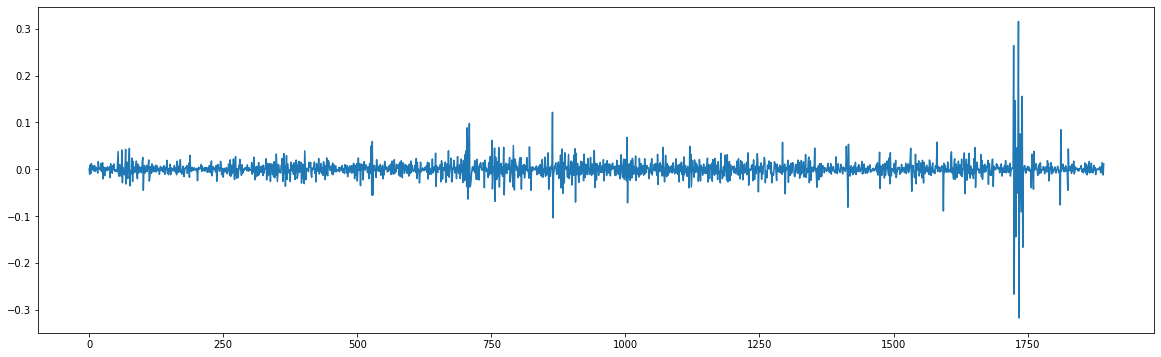

In [ ]:
diff_smt_1 = np.diff(df_smt_ext['polarity'])
plt.plot(diff_smt_1)
plt.show()

BTC close price와 BTC tweets polarity 변동성 비교

In [ ]:
#범위 확인

In [ ]:
raw.Date

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
1889    2019-11-19
1890    2019-11-20
1891    2019-11-21
1892    2019-11-22
1893    2019-11-23
Name: Date, Length: 1894, dtype: object

In [ ]:
df_smt_ext.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18',
       '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-23'],
      dtype='object', name='date', length=1894)

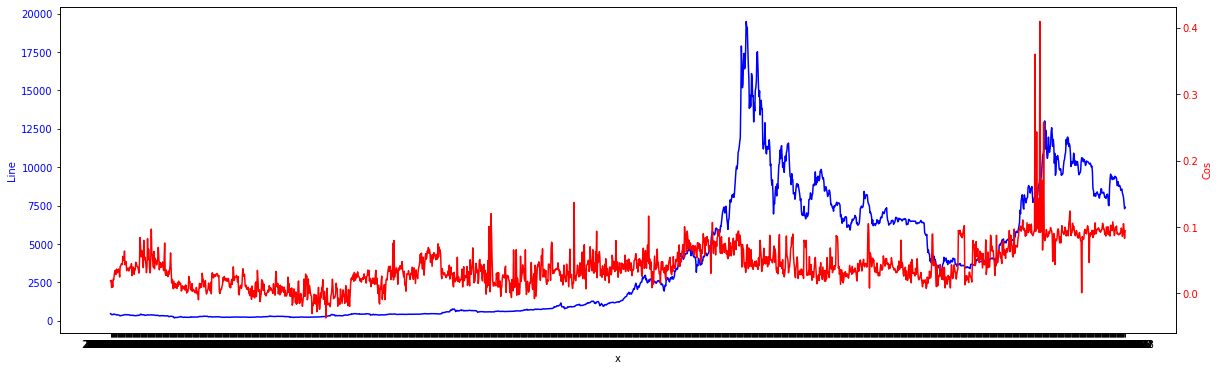

In [ ]:
fig = plt.figure(figsize=(20,6)) ## 캔버스 생성
#fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'b'
ax1.plot(train_df, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(df_smt_ext['polarity'], color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
 
plt.show()

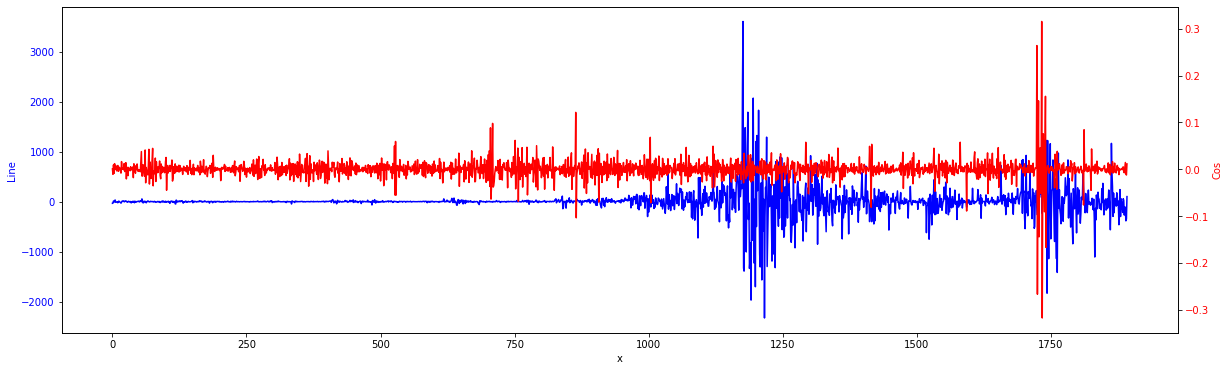

In [ ]:
fig = plt.figure(figsize=(20,6)) ## 캔버스 생성
#fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'b'
ax1.plot(diff_1, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(diff_smt_1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
 
plt.show()

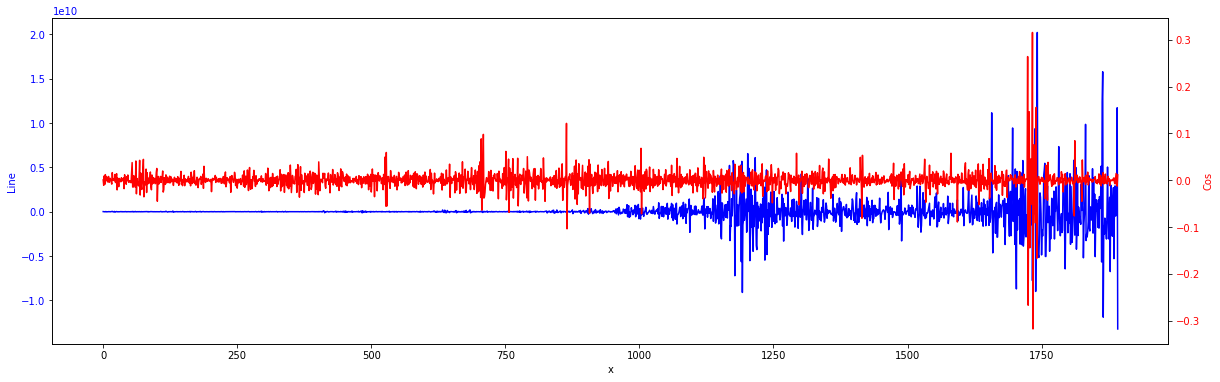

In [ ]:
fig = plt.figure(figsize=(20,6)) ## 캔버스 생성
#fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'b'
ax1.plot(diff_Volume, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(diff_smt_1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
 
plt.show()

=> 스케일링 필요

close price와 polarity 상관관계 분석

In [ ]:
df_smt_ext_2 = df_smt_ext.reset_index().rename(columns={'date':'Date'})
df_smt_ext_2.head()

,Date,polarity,subjectivity
0,2014-09-17,0.018873,0.174188
1,2014-09-18,0.019552,0.184710
2,2014-09-19,0.008737,0.186219
3,2014-09-20,0.018103,0.172069
4,2014-09-21,0.009293,0.178290


In [ ]:
#상승하락율
rate = []
rate.append(((raw['Close'].iloc[0] - 466.04) / 466.04) * 100)
for i in range(1, len(raw)):
  rate.append(((raw.Close.iloc[i] - raw.Close.iloc[i-1]) / raw.Close.iloc[i-1]) * 100)
raw['rate'] = rate

#전날과 당일 가격차이(전날보다 얼마나 올랐는지 내렸는지)
difference = []
difference.append(raw['Close'].iloc[0] - 466.04) 
for i in range(1, len(raw)):
  difference.append(raw.Close.iloc[i] - raw.Close.iloc[i-1])
raw['difference'] = difference

In [ ]:
raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rate,difference
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,-1.868077,-8.705985
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-7.192558,-32.894013
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-6.984264,-29.644012
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,3.573492,14.108002
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-2.465855,-10.082978


In [ ]:
df_join = pd.merge(raw, df_smt_ext_2, left_on='Date', right_on='Date', how='inner')
df_join.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,-1.868077,-8.705985,0.018873,0.174188
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-7.192558,-32.894013,0.019552,0.184710
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-6.984264,-29.644012,0.008737,0.186219
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,3.573492,14.108002,0.018103,0.172069
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-2.465855,-10.082978,0.009293,0.178290


In [ ]:
df_join_minus = df_join[df_join.rate < 0]
df_join_plus = df_join[df_join.rate >= 0]

In [ ]:
df_corr_minus_p = df_join_minus.corr(method="pearson")
df_corr_minus_p

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.999784,0.997366,0.998798,0.998798,0.793035,-0.219423,-0.663730,0.554309,0.483031
High,0.999784,1.000000,0.997096,0.998664,0.998664,0.792509,-0.218671,-0.662311,0.553353,0.481787
Low,0.997366,0.997096,1.000000,0.999259,0.999259,0.791472,-0.179957,-0.614629,0.566727,0.488893
Close,0.998798,0.998664,0.999259,1.000000,1.000000,0.791614,-0.186667,-0.626329,0.562039,0.485623
Adj Close,0.998798,0.998664,0.999259,1.000000,1.000000,0.791614,-0.186667,-0.626329,0.562039,0.485623
Volume,0.793035,0.792509,0.791472,0.791614,0.791614,1.000000,-0.182295,-0.533679,0.636044,0.492926
rate,-0.219423,-0.218671,-0.179957,-0.186667,-0.186667,-0.182295,1.000000,0.643015,-0.030748,-0.056488
difference,-0.663730,-0.662311,-0.614629,-0.626329,-0.626329,-0.533679,0.643015,1.000000,-0.239201,-0.271254
polarity,0.554309,0.553353,0.566727,0.562039,0.562039,0.636044,-0.030748,-0.239201,1.000000,0.399799
subjectivity,0.483031,0.481787,0.488893,0.485623,0.485623,0.492926,-0.056488,-0.271254,0.399799,1.000000


In [ ]:
df_corr_plus_p = df_join_plus.corr(method="pearson")
df_corr_plus_p

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.998505,0.999673,0.998661,0.998661,0.763301,0.194730,0.584457,0.553338,0.493807
High,0.998505,1.000000,0.998251,0.999830,0.999830,0.766646,0.231369,0.625407,0.549470,0.489133
Low,0.999673,0.998251,1.000000,0.998444,0.998444,0.764192,0.195660,0.585865,0.555064,0.495281
Close,0.998661,0.999830,0.998444,1.000000,1.000000,0.766188,0.231349,0.625592,0.551069,0.490218
Adj Close,0.998661,0.999830,0.998444,1.000000,1.000000,0.766188,0.231349,0.625592,0.551069,0.490218
Volume,0.763301,0.766646,0.764192,0.766188,0.766188,1.000000,0.217027,0.505574,0.604530,0.498756
rate,0.194730,0.231369,0.195660,0.231349,0.231349,0.217027,1.000000,0.695037,0.110504,0.032795
difference,0.584457,0.625407,0.585865,0.625592,0.625592,0.505574,0.695037,1.000000,0.296457,0.241453
polarity,0.553338,0.549470,0.555064,0.551069,0.551069,0.604530,0.110504,0.296457,1.000000,0.411470
subjectivity,0.493807,0.489133,0.495281,0.490218,0.490218,0.498756,0.032795,0.241453,0.411470,1.000000


In [ ]:
df_corr_p = df_join.corr(method="pearson")
df_corr_p

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.998799,0.998067,0.997500,0.997500,0.777163,-0.029188,-0.034503,0.552825,0.488998
High,0.998799,1.000000,0.997690,0.999002,0.999002,0.778832,-0.000982,0.003754,0.550940,0.486003
Low,0.998067,0.997690,1.000000,0.998657,0.998657,0.777010,0.000971,0.009227,0.560229,0.492557
Close,0.997500,0.999002,0.998657,1.000000,1.000000,0.777881,0.022711,0.036146,0.556009,0.488076
Adj Close,0.997500,0.999002,0.998657,1.000000,1.000000,0.777881,0.022711,0.036146,0.556009,0.488076
Volume,0.777163,0.778832,0.777010,0.777881,0.777881,1.000000,0.011265,0.009734,0.618850,0.496340
rate,-0.029188,-0.000982,0.000971,0.022711,0.022711,0.011265,1.000000,0.735433,0.036709,-0.036858
difference,-0.034503,0.003754,0.009227,0.036146,0.036146,0.009734,0.735433,1.000000,0.044226,-0.012766
polarity,0.552825,0.550940,0.560229,0.556009,0.556009,0.618850,0.036709,0.044226,1.000000,0.405517
subjectivity,0.488998,0.486003,0.492557,0.488076,0.488076,0.496340,-0.036858,-0.012766,0.405517,1.000000


In [ ]:
#df_corr_sp = df_join.corr(method="spearman")
#df_corr_sp

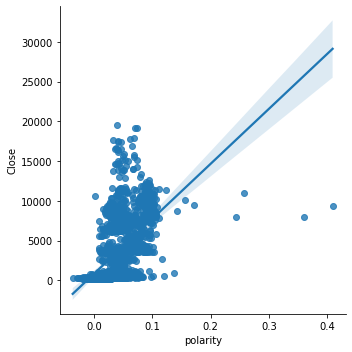

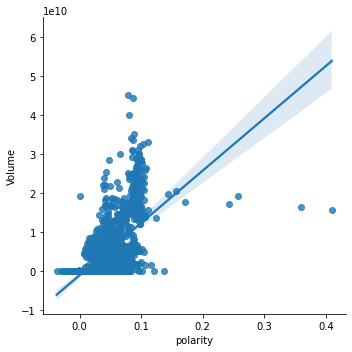

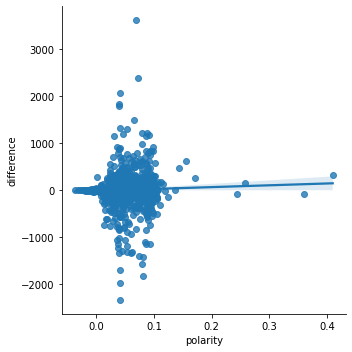

In [ ]:
sns.lmplot(data=df_join, x="polarity", y="Close")
sns.lmplot(data=df_join, x="polarity", y="Volume")
sns.lmplot(data=df_join, x="polarity", y="difference")

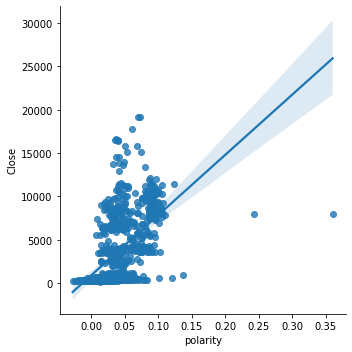

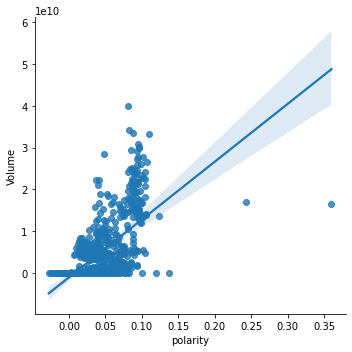

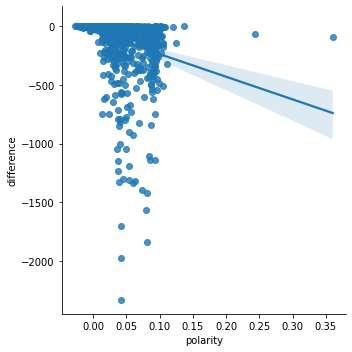

In [ ]:
sns.lmplot(data=df_join_minus, x="polarity", y="Close")
sns.lmplot(data=df_join_minus, x="polarity", y="Volume")
sns.lmplot(data=df_join_minus, x="polarity", y="difference")

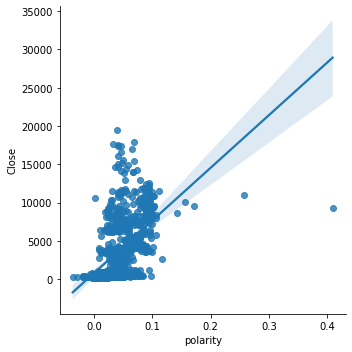

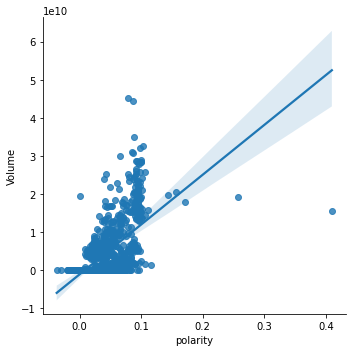

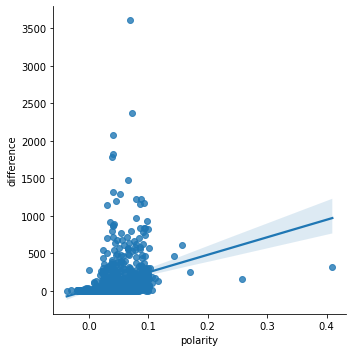

In [ ]:
sns.lmplot(data=df_join_plus, x="polarity", y="Close")
sns.lmplot(data=df_join_plus, x="polarity", y="Volume")
sns.lmplot(data=df_join_plus, x="polarity", y="difference")

In [ ]:
import scipy.stats as stats
print("전체")
print(stats.pearsonr(df_join.polarity, df_join.Close))
print(stats.pearsonr(df_join.polarity, df_join.Volume))
print(stats.pearsonr(df_join.polarity, df_join.rate))
print(stats.pearsonr(df_join.polarity, df_join.difference))

print("수익률 마이너스")
print(stats.pearsonr(df_join_minus.polarity, df_join_minus.Close))
print(stats.pearsonr(df_join_minus.polarity, df_join_minus.Volume))

print("수익률 플러스")
print(stats.pearsonr(df_join_plus.polarity, df_join_plus.Close))
print(stats.pearsonr(df_join_plus.polarity, df_join_plus.Volume))

전체
(0.5560094814084726, 3.775055771743553e-154)
(0.618850414569853, 1.2511892488548735e-200)
(0.03670909516752223, 0.11025067309634848)
(0.044226264910232925, 0.05430410720431465)
수익률 마이너스
(0.5620392088780659, 1.0875703648324735e-72)
(0.6360443102928279, 1.417641584381511e-98)
수익률 플러스
(0.5510687477697429, 2.9137033755315713e-83)
(0.6045301391011588, 3.836077898754589e-104)


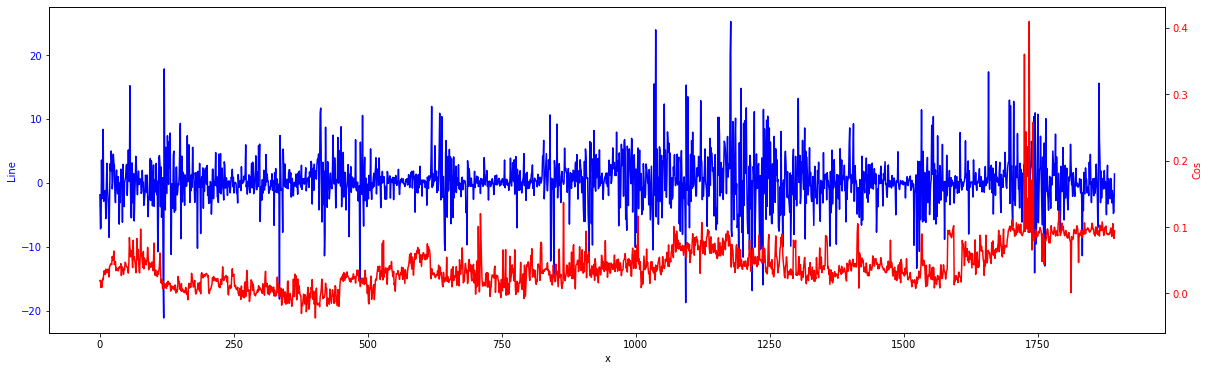

In [ ]:
fig = plt.figure(figsize=(20,6)) ## 캔버스 생성
#fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'b'
ax1.plot(df_join.rate, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(df_join.polarity, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
 
plt.show()

회귀분석

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
res = ols('Close ~ polarity', data=df_join).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     846.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          3.78e-154
Time:                        08:58:33   Log-Likelihood:                -18029.
No. Observations:                1894   AIC:                         3.606e+04
Df Residuals:                    1892   BIC:                         3.607e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    872.8727    123.008      7.096      0.000     631.628    1114.117
polarity    6.895e+04   2369.579     29.097      0.000    6.43e+04    7.36e+04
==============================================================================
Omnibus:                      362.919   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.649
Skew:                           0.982   Prob(JB):                    7.95e-231
Kurtosis:                       6.094   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_join).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.25e-200
Time:                        09:03:20   Log-Likelihood:                -45146.
No. Observations:                1894   AIC:                         9.030e+04
Df Residuals:                    1892   BIC:                         9.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.036e+09   2.03e+08     -5.097      0.000   -1.43e+09   -6.37e+08
polarity    1.341e+11   3.91e+09     34.269      0.000    1.26e+11    1.42e+11
==============================================================================
Omnibus:                      481.481   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2850.373
Skew:                           1.058   Prob(JB):                         0.00
Kurtosis:                       8.625   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_join).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.708
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0543
Time:                        09:03:24   Log-Likelihood:                -13360.
No. Observations:                1894   AIC:                         2.672e+04
Df Residuals:                    1892   BIC:                         2.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1987     10.454     -1.167      0.243     -32.700       8.303
polarity     387.7647    201.373      1.926      0.054      -7.173     782.702
==============================================================================
Omnibus:                      714.725   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74402.860
Skew:                           0.782   Prob(JB):                         0.00
Kurtosis:                      33.665   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Close ~ polarity', data=df_join_minus).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     395.7
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.09e-72
Time:                        09:27:31   Log-Likelihood:                -8175.4
No. Observations:                 859   AIC:                         1.635e+04
Df Residuals:                     857   BIC:                         1.636e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    913.8451    181.366      5.039      0.000     557.871    1269.819
polarity    6.943e+04   3490.251     19.893      0.000    6.26e+04    7.63e+04
==============================================================================
Omnibus:                      145.012   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.722
Skew:                           0.876   Prob(JB):                     3.50e-83
Kurtosis:                       5.746   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_join_minus).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     582.3
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.42e-98
Time:                        09:27:32   Log-Likelihood:                -20469.
No. Observations:                 859   AIC:                         4.094e+04
Df Residuals:                     857   BIC:                         4.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+09   2.98e+08     -3.444      0.001   -1.61e+09   -4.41e+08
polarity    1.383e+11   5.73e+09     24.130      0.000    1.27e+11     1.5e+11
==============================================================================
Omnibus:                      170.532   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.798
Skew:                           0.852   Prob(JB):                    6.84e-163
Kurtosis:                       7.238   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_join_minus).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     52.01
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.21e-12
Time:                        09:27:32   Log-Likelihood:                -5967.4
No. Observations:                 859   AIC:                         1.194e+04
Df Residuals:                     857   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.8599     13.875     -3.377      0.001     -74.093     -19.627
polarity   -1925.6485    267.011     -7.212      0.000   -2449.720   -1401.577
==============================================================================
Omnibus:                      726.920   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15862.510
Skew:                          -3.861   Prob(JB):                         0.00
Kurtosis:                      22.584   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Close ~ polarity', data=df_join_plus).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     450.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.91e-83
Time:                        09:27:32   Log-Likelihood:                -9853.7
No. Observations:                1035   AIC:                         1.971e+04
Df Residuals:                    1033   BIC:                         1.972e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    838.9690    167.507      5.009      0.000     510.276    1167.662
polarity    6.855e+04   3229.509     21.225      0.000    6.22e+04    7.49e+04
==============================================================================
Omnibus:                      225.588   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.598
Skew:                           1.070   Prob(JB):                    4.02e-151
Kurtosis:                       6.388   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_join_plus).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     594.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          3.84e-104
Time:                        09:27:32   Log-Likelihood:                -24676.
No. Observations:                1035   AIC:                         4.936e+04
Df Residuals:                    1033   BIC:                         4.937e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.041e+09   2.78e+08     -3.747      0.000   -1.59e+09   -4.96e+08
polarity    1.306e+11   5.36e+09     24.391      0.000     1.2e+11    1.41e+11
==============================================================================
Omnibus:                      319.752   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2202.077
Skew:                           1.236   Prob(JB):                         0.00
Kurtosis:                       9.705   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_join_plus).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     99.53
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.92e-22
Time:                        09:27:33   Log-Likelihood:                -7137.8
No. Observations:                1035   AIC:                         1.428e+04
Df Residuals:                    1033   BIC:                         1.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0293     12.146      1.237      0.216      -8.804      38.863
polarity    2336.2826    234.174      9.977      0.000    1876.772    2795.793
==============================================================================
Omnibus:                     1254.749   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158786.584
Skew:                           6.127   Prob(JB):                         0.00
Kurtosis:                      62.429   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

polarity가 다음날 종가와 관련성?

In [ ]:
df_smt_ext_push = df_smt_ext_2.copy()
push = []
push.append(df_smt_ext_push.polarity.iloc[range(0, df_smt_ext_push.index[-1])])
df_smt_ext_push.polarity.iloc[range(1, df_smt_ext_push.index[-1]+1)] = push
df_smt_ext_push = df_smt_ext_push.drop(0)
df_smt_ext_push

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,polarity,subjectivity
1,2014-09-18,0.018873,0.184710
2,2014-09-19,0.019552,0.186219
3,2014-09-20,0.008737,0.172069
4,2014-09-21,0.018103,0.178290
5,2014-09-22,0.009293,0.161228
...,...,...,...
1889,2019-11-19,0.085699,0.279142
1890,2019-11-20,0.090451,0.290566
1891,2019-11-21,0.104945,0.283720
1892,2019-11-22,0.095124,0.279596


In [ ]:
df_join_2 = pd.merge(raw, df_smt_ext_push, left_on='Date', right_on='Date', how='inner')
df_join_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-7.192558,-32.894013,0.018873,0.184710
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-6.984264,-29.644012,0.019552,0.186219
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,3.573492,14.108002,0.008737,0.172069
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-2.465855,-10.082978,0.018103,0.178290
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0,0.835210,3.330994,0.009293,0.161228


In [ ]:
df_join_minus_2 = df_join_2[df_join_2.rate < 0]
df_join_plus_2 = df_join_2[df_join_2.rate >= 0]

In [ ]:
df_corr_minus_p_2 = df_join_minus_2.corr(method="pearson")
df_corr_minus_p_2

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.999784,0.997364,0.998797,0.998797,0.792917,-0.219297,-0.663638,0.542138,0.482804
High,0.999784,1.000000,0.997094,0.998663,0.998663,0.792392,-0.218545,-0.662219,0.540873,0.481560
Low,0.997364,0.997094,1.000000,0.999258,0.999258,0.791353,-0.179813,-0.614513,0.552053,0.488668
Close,0.998797,0.998663,0.999258,1.000000,1.000000,0.791495,-0.186526,-0.626218,0.547587,0.485397
Adj Close,0.998797,0.998663,0.999258,1.000000,1.000000,0.791495,-0.186526,-0.626218,0.547587,0.485397
Volume,0.792917,0.792392,0.791353,0.791495,0.791495,1.000000,-0.182171,-0.533532,0.624322,0.492733
rate,-0.219297,-0.218545,-0.179813,-0.186526,-0.186526,-0.182171,1.000000,0.642991,-0.073945,-0.056362
difference,-0.663638,-0.662219,-0.614513,-0.626218,-0.626218,-0.533532,0.642991,1.000000,-0.264676,-0.271059
polarity,0.542138,0.540873,0.552053,0.547587,0.547587,0.624322,-0.073945,-0.264676,1.000000,0.313618
subjectivity,0.482804,0.481560,0.488668,0.485397,0.485397,0.492733,-0.056362,-0.271059,0.313618,1.000000


In [ ]:
df_corr_plus_p_2 = df_join_plus_2.corr(method="pearson")
df_corr_plus_p_2

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.998505,0.999673,0.998661,0.998661,0.763301,0.194730,0.584457,0.570650,0.493807
High,0.998505,1.000000,0.998251,0.999830,0.999830,0.766646,0.231369,0.625407,0.567513,0.489133
Low,0.999673,0.998251,1.000000,0.998444,0.998444,0.764192,0.195660,0.585865,0.572556,0.495281
Close,0.998661,0.999830,0.998444,1.000000,1.000000,0.766188,0.231349,0.625592,0.569176,0.490218
Adj Close,0.998661,0.999830,0.998444,1.000000,1.000000,0.766188,0.231349,0.625592,0.569176,0.490218
Volume,0.763301,0.766646,0.764192,0.766188,0.766188,1.000000,0.217027,0.505574,0.631806,0.498756
rate,0.194730,0.231369,0.195660,0.231349,0.231349,0.217027,1.000000,0.695037,0.103507,0.032795
difference,0.584457,0.625407,0.585865,0.625592,0.625592,0.505574,0.695037,1.000000,0.319067,0.241453
polarity,0.570650,0.567513,0.572556,0.569176,0.569176,0.631806,0.103507,0.319067,1.000000,0.302277
subjectivity,0.493807,0.489133,0.495281,0.490218,0.490218,0.498756,0.032795,0.241453,0.302277,1.000000


In [ ]:
df_corr_p_2 = df_join_2.corr(method="pearson")
df_corr_p_2

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.998798,0.998067,0.997499,0.997499,0.777108,-0.029427,-0.034528,0.555673,0.488916
High,0.998798,1.000000,0.997689,0.999002,0.999002,0.778777,-0.001213,0.003736,0.553878,0.485920
Low,0.998067,0.997689,1.000000,0.998657,0.998657,0.776955,0.000737,0.009210,0.561942,0.492476
Close,0.997499,0.999002,0.998657,1.000000,1.000000,0.777826,0.022484,0.036134,0.558016,0.487994
Adj Close,0.997499,0.999002,0.998657,1.000000,1.000000,0.777826,0.022484,0.036134,0.558016,0.487994
Volume,0.777108,0.778777,0.776955,0.777826,0.777826,1.000000,0.011086,0.009720,0.627358,0.496268
rate,-0.029427,-0.001213,0.000737,0.022484,0.022484,0.011086,1.000000,0.735478,0.016450,-0.036991
difference,-0.034528,0.003736,0.009210,0.036134,0.036134,0.009720,0.735478,1.000000,0.032860,-0.012777
polarity,0.555673,0.553878,0.561942,0.558016,0.558016,0.627358,0.016450,0.032860,1.000000,0.306392
subjectivity,0.488916,0.485920,0.492476,0.487994,0.487994,0.496268,-0.036991,-0.012777,0.306392,1.000000


In [ ]:
#df_corr_sp_2 = df_join_2.corr(method="spearman")
#df_corr_sp_2

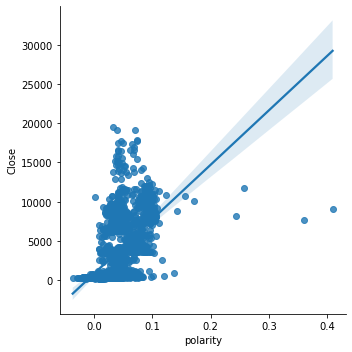

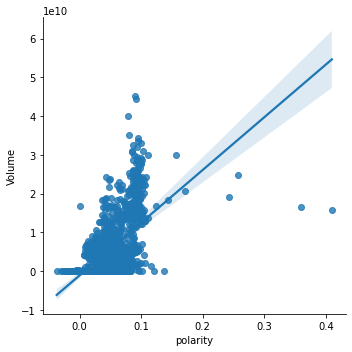

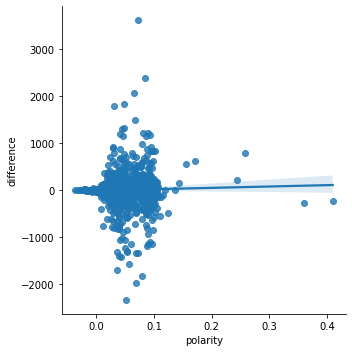

In [ ]:
sns.lmplot(data=df_join_2, x="polarity", y="Close")
sns.lmplot(data=df_join_2, x="polarity", y="Volume")
sns.lmplot(data=df_join_2, x="polarity", y="difference")

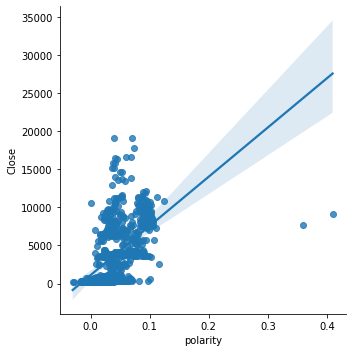

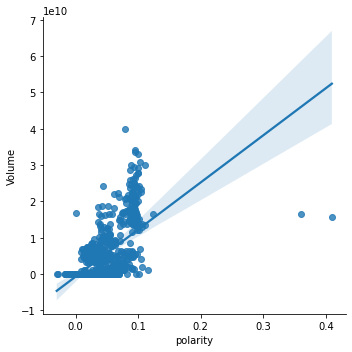

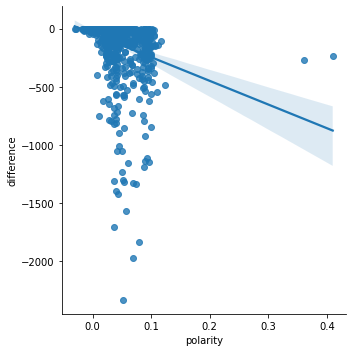

In [ ]:
sns.lmplot(data=df_join_minus_2, x="polarity", y="Close")
sns.lmplot(data=df_join_minus_2, x="polarity", y="Volume")
sns.lmplot(data=df_join_minus_2, x="polarity", y="difference")

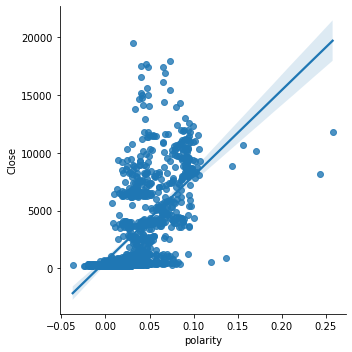

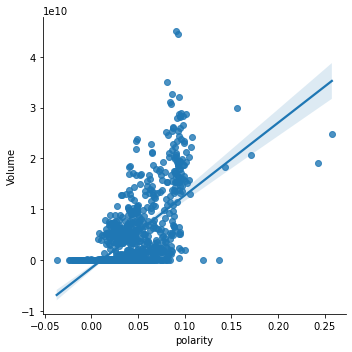

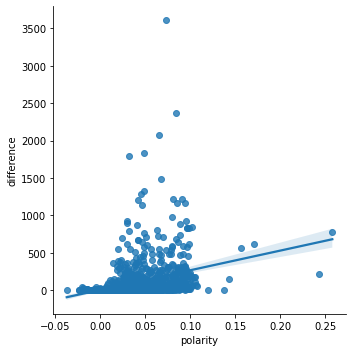

In [ ]:
sns.lmplot(data=df_join_plus_2, x="polarity", y="Close")
sns.lmplot(data=df_join_plus_2, x="polarity", y="Volume")
sns.lmplot(data=df_join_plus_2, x="polarity", y="difference")

In [ ]:
print("전체")
print(stats.pearsonr(df_join_2.polarity, df_join_2.Close))
print(stats.pearsonr(df_join_2.polarity, df_join_2.Volume))
print(stats.pearsonr(df_join_2.polarity, df_join_2.rate))
print(stats.pearsonr(df_join_2.polarity, df_join_2.difference))
print("수익률 마이너스")
print(stats.pearsonr(df_join_minus_2.polarity, df_join_minus_2.Close))
print(stats.pearsonr(df_join_minus_2.polarity, df_join_minus_2.Volume))
print("수익률 플러스")
print(stats.pearsonr(df_join_plus_2.polarity, df_join_plus_2.Close))
print(stats.pearsonr(df_join_plus_2.polarity, df_join_plus_2.Volume))

전체
(0.5580159758826598, 2.1136622709069106e-155)
(0.627358074902071, 1.2002672453567215e-207)
(0.01645024727876446, 0.4744217147952234)
(0.03286011841010719, 0.15296400619326983)
수익률 마이너스
(0.5475870957669859, 2.7371900679027342e-68)
(0.6243223433763124, 6.73077028735734e-94)
수익률 플러스
(0.5691761715665437, 6.59030317090852e-90)
(0.6318055589142914, 2.0686777615959853e-116)


In [ ]:
res = ols('Close ~ polarity', data=df_join_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     855.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          2.11e-155
Time:                        09:05:23   Log-Likelihood:                -18017.
No. Observations:                1893   AIC:                         3.604e+04
Df Residuals:                    1891   BIC:                         3.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    864.7705    122.835      7.040      0.000     623.864    1105.677
polarity    6.924e+04   2367.695     29.242      0.000    6.46e+04    7.39e+04
==============================================================================
Omnibus:                      357.407   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.276
Skew:                           0.959   Prob(JB):                    8.73e-234
Kurtosis:                       6.151   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_join_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     1227.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.20e-207
Time:                        09:05:24   Log-Likelihood:                -45107.
No. Observations:                1893   AIC:                         9.022e+04
Df Residuals:                    1891   BIC:                         9.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.108e+09   2.01e+08     -5.501      0.000    -1.5e+09   -7.13e+08
polarity    1.361e+11   3.88e+09     35.033      0.000    1.28e+11    1.44e+11
==============================================================================
Omnibus:                      438.904   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2550.341
Skew:                           0.959   Prob(JB):                         0.00
Kurtosis:                       8.353   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_join_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.044
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.153
Time:                        09:05:24   Log-Likelihood:                -13354.
No. Observations:                1893   AIC:                         2.671e+04
Df Residuals:                    1891   BIC:                         2.672e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1170     10.462     -0.776      0.438     -28.636      12.402
polarity     288.3214    201.664      1.430      0.153    -107.185     683.828
==============================================================================
Omnibus:                      716.569   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74012.193
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                      33.592   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Close ~ polarity', data=df_join_minus_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     366.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.74e-68
Time:                        09:31:24   Log-Likelihood:                -8176.0
No. Observations:                 858   AIC:                         1.636e+04
Df Residuals:                     856   BIC:                         1.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1121.4757    178.281      6.291      0.000     771.557    1471.394
polarity    6.454e+04   3370.994     19.147      0.000    5.79e+04    7.12e+04
==============================================================================
Omnibus:                      150.075   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.678
Skew:                           0.828   Prob(JB):                    8.52e-109
Kurtosis:                       6.343   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_join_minus_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     546.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.73e-94
Time:                        09:31:24   Log-Likelihood:                -20456.
No. Observations:                 858   AIC:                         4.092e+04
Df Residuals:                     856   BIC:                         4.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.542e+08   2.93e+08     -2.233      0.026   -1.23e+09   -7.92e+07
polarity    1.295e+11   5.54e+09     23.383      0.000    1.19e+11     1.4e+11
==============================================================================
Omnibus:                      164.887   Durbin-Watson:                   0.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.049
Skew:                           0.674   Prob(JB):                    6.85e-251
Kurtosis:                       8.514   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_join_minus_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     64.48
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.21e-15
Time:                        09:31:24   Log-Likelihood:                -5954.9
No. Observations:                 858   AIC:                         1.191e+04
Df Residuals:                     856   BIC:                         1.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.7325     13.393     -3.191      0.001     -69.020     -16.445
polarity   -2033.6053    253.247     -8.030      0.000   -2530.662   -1536.548
==============================================================================
Omnibus:                      728.077   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15969.711
Skew:                          -3.875   Prob(JB):                         0.00
Kurtosis:                      22.663   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Close ~ polarity', data=df_join_plus_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     495.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.59e-90
Time:                        09:31:24   Log-Likelihood:                -9838.4
No. Observations:                1035   AIC:                         1.968e+04
Df Residuals:                    1033   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    613.1975    169.829      3.611      0.000     279.949     946.446
polarity    7.405e+04   3328.029     22.249      0.000    6.75e+04    8.06e+04
==============================================================================
Omnibus:                      213.885   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.646
Skew:                           1.139   Prob(JB):                    1.41e-103
Kurtosis:                       5.407   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Close ~ polarity', data=df_join_plus_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     495.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.59e-90
Time:                        09:31:25   Log-Likelihood:                -9838.4
No. Observations:                1035   AIC:                         1.968e+04
Df Residuals:                    1033   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    613.1975    169.829      3.611      0.000     279.949     946.446
polarity    7.405e+04   3328.029     22.249      0.000    6.75e+04    8.06e+04
==============================================================================
Omnibus:                      213.885   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.646
Skew:                           1.139   Prob(JB):                    1.41e-103
Kurtosis:                       5.407   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Close ~ polarity', data=df_join_plus_2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     495.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.59e-90
Time:                        09:31:25   Log-Likelihood:                -9838.4
No. Observations:                1035   AIC:                         1.968e+04
Df Residuals:                    1033   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    613.1975    169.829      3.611      0.000     279.949     946.446
polarity    7.405e+04   3328.029     22.249      0.000    6.75e+04    8.06e+04
==============================================================================
Omnibus:                      213.885   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.646
Skew:                           1.139   Prob(JB):                    1.41e-103
Kurtosis:                       5.407   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

polarity가 일주일 뒤의 종가와 관련?

In [ ]:
range(0, df_smt_ext_push.index[-7])

range(0, 1887)

In [ ]:
df_smt_ext_push_2 = df_smt_ext_2.copy()
push = []
push.append(df_smt_ext_push_2.polarity.iloc[range(0, df_smt_ext_push.index[-7])])
df_smt_ext_push_2.polarity.iloc[range(7, df_smt_ext_push.index[-1]+1)] = push
df_smt_ext_push_2 = df_smt_ext_push_2.drop([0,1,2,3,4,5,6])
df_smt_ext_push_2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,polarity,subjectivity
7,2014-09-24,0.018873,0.195783
8,2014-09-25,0.019552,0.196095
9,2014-09-26,0.008737,0.224841
10,2014-09-27,0.018103,0.249432
11,2014-09-28,0.009293,0.255346
...,...,...,...
1889,2019-11-19,0.088876,0.279142
1890,2019-11-20,0.090381,0.290566
1891,2019-11-21,0.089516,0.283720
1892,2019-11-22,0.093276,0.279596


In [ ]:
df_join_3 = pd.merge(raw, df_smt_ext_push_2, left_on='Date', right_on='Date', how='inner')
df_join_3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
0,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0,-2.888081,-12.585998,0.018873,0.195783
1,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0,-2.748309,-11.630982,0.019552,0.196095
2,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0,-1.736994,-7.149017,0.008737,0.224841
3,2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300.0,-1.212833,-4.904999,0.018103,0.249432
4,2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300.0,-5.591457,-22.338989,0.009293,0.255346


In [ ]:
df_join_minus_3 = df_join_3[df_join_3.rate < 0]
df_join_plus_3 = df_join_3[df_join_3.rate >= 0]

In [ ]:
df_corr_minus_p_3 = df_join_minus_3.corr(method="pearson")
df_corr_minus_p_3

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.999784,0.997358,0.998794,0.998794,0.792564,-0.223131,-0.663482,0.576195,0.482430
High,0.999784,1.000000,0.997087,0.998660,0.998660,0.792037,-0.222372,-0.662060,0.575763,0.481184
Low,0.997358,0.997087,1.000000,0.999257,0.999257,0.790997,-0.183561,-0.614291,0.583350,0.488306
Close,0.998794,0.998660,0.999257,1.000000,1.000000,0.791139,-0.190275,-0.626011,0.580291,0.485029
Adj Close,0.998794,0.998660,0.999257,1.000000,1.000000,0.791139,-0.190275,-0.626011,0.580291,0.485029
Volume,0.792564,0.792037,0.790997,0.791139,0.791139,1.000000,-0.185151,-0.533179,0.673018,0.492376
rate,-0.223131,-0.222372,-0.183561,-0.190275,-0.190275,-0.185151,1.000000,0.646239,-0.127306,-0.057708
difference,-0.663482,-0.662060,-0.614291,-0.626011,-0.626011,-0.533179,0.646239,1.000000,-0.310077,-0.270685
polarity,0.576195,0.575763,0.583350,0.580291,0.580291,0.673018,-0.127306,-0.310077,1.000000,0.283290
subjectivity,0.482430,0.481184,0.488306,0.485029,0.485029,0.492376,-0.057708,-0.270685,0.283290,1.000000


In [ ]:
df_corr_plus_p_3 = df_join_plus_3.corr(method="pearson")
df_corr_plus_p_3

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.998503,0.999672,0.998658,0.998658,0.762992,0.196768,0.584259,0.566369,0.493386
High,0.998503,1.000000,0.998248,0.999830,0.999830,0.766343,0.233487,0.625253,0.562945,0.488705
Low,0.999672,0.998248,1.000000,0.998442,0.998442,0.763885,0.197707,0.585670,0.567636,0.494861
Close,0.998658,0.999830,0.998442,1.000000,1.000000,0.765884,0.233474,0.625440,0.564498,0.489792
Adj Close,0.998658,0.999830,0.998442,1.000000,1.000000,0.765884,0.233474,0.625440,0.564498,0.489792
Volume,0.762992,0.766343,0.763885,0.765884,0.765884,1.000000,0.218688,0.505286,0.607297,0.498389
rate,0.196768,0.233487,0.197707,0.233474,0.233474,0.218688,1.000000,0.697166,0.111082,0.033250
difference,0.584259,0.625253,0.585670,0.625440,0.625440,0.505286,0.697166,1.000000,0.310695,0.241077
polarity,0.566369,0.562945,0.567636,0.564498,0.564498,0.607297,0.111082,0.310695,1.000000,0.276387
subjectivity,0.493386,0.488705,0.494861,0.489792,0.489792,0.498389,0.033250,0.241077,0.276387,1.000000


In [ ]:
df_corr_p_3 = df_join_3.corr(method="pearson")
df_corr_p_3

,Open,High,Low,Close,Adj Close,Volume,rate,difference,polarity,subjectivity
Open,1.000000,0.998796,0.998063,0.997494,0.997494,0.776778,-0.030130,-0.034633,0.569233,0.488531
High,0.998796,1.000000,0.997684,0.999000,0.999000,0.778450,-0.001803,0.003672,0.568023,0.485531
Low,0.998063,0.997684,1.000000,0.998654,0.998654,0.776625,0.000145,0.009151,0.574150,0.492098
Close,0.997494,0.999000,0.998654,1.000000,1.000000,0.777498,0.021985,0.036105,0.571326,0.487608
Adj Close,0.997494,0.999000,0.998654,1.000000,1.000000,0.777498,0.021985,0.036105,0.571326,0.487608
Volume,0.776778,0.778450,0.776625,0.777498,0.777498,1.000000,0.010674,0.009674,0.636363,0.495917
rate,-0.030130,-0.001803,0.000145,0.021985,0.021985,0.010674,1.000000,0.737578,0.006331,-0.037162
difference,-0.034633,0.003672,0.009151,0.036105,0.036105,0.009674,0.737578,1.000000,0.028362,-0.012799
polarity,0.569233,0.568023,0.574150,0.571326,0.571326,0.636363,0.006331,0.028362,1.000000,0.278866
subjectivity,0.488531,0.485531,0.492098,0.487608,0.487608,0.495917,-0.037162,-0.012799,0.278866,1.000000


In [ ]:
#df_corr_sp_3 = df_join_3.corr(method="spearman")
#df_corr_sp_3

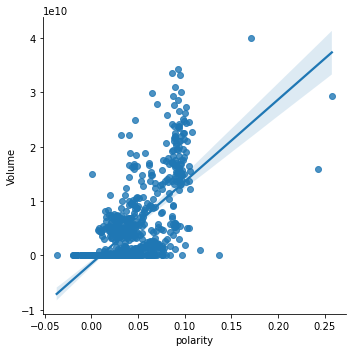

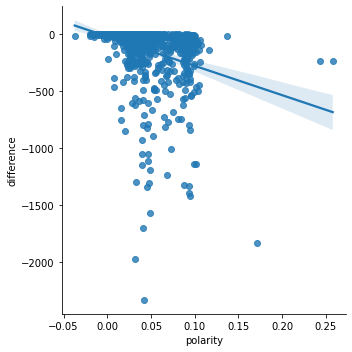

In [ ]:
sns.lmplot(data=df_join_minus_3, x="polarity", y="Volume")
sns.lmplot(data=df_join_minus_3, x="polarity", y="difference")

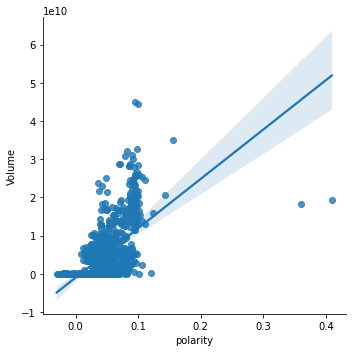

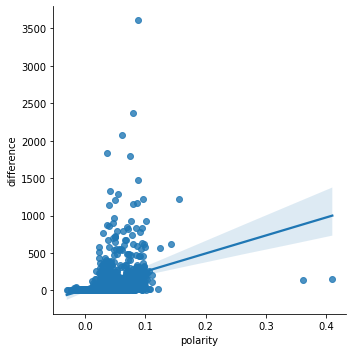

In [ ]:
sns.lmplot(data=df_join_plus_3, x="polarity", y="Volume")
sns.lmplot(data=df_join_plus_3, x="polarity", y="difference")

In [ ]:
print("pearson")
print(stats.pearsonr(df_join_3.polarity, df_join_3.Close))
print(stats.pearsonr(df_join_3.polarity, df_join_3.Volume))
print(stats.pearsonr(df_join_3.polarity, df_join_3.rate))
print(stats.pearsonr(df_join_3.polarity, df_join_3.difference))

pearson
(0.5713262866884584, 5.854463607076902e-164)
(0.6363631580635257, 9.359859786066013e-215)
(0.006330897523418048, 0.7834451097396582)
(0.028362040688639092, 0.2181480966849094)


In [ ]:
res = ols('Close ~ polarity', data=df_join_3).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     913.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          5.85e-164
Time:                        09:06:14   Log-Likelihood:                -17940.
No. Observations:                1887   AIC:                         3.588e+04
Df Residuals:                    1885   BIC:                         3.589e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    810.3453    121.635      6.662      0.000     571.792    1048.898
polarity    7.111e+04   2352.673     30.223      0.000    6.65e+04    7.57e+04
==============================================================================
Omnibus:                      323.949   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.846
Skew:                           0.913   Prob(JB):                    9.64e-189
Kurtosis:                       5.772   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_join_3).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1283.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          9.36e-215
Time:                        09:06:14   Log-Likelihood:                -44947.
No. Observations:                1887   AIC:                         8.990e+04
Df Residuals:                    1885   BIC:                         8.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.172e+09      2e+08     -5.860      0.000   -1.56e+09   -7.79e+08
polarity    1.385e+11   3.87e+09     35.817      0.000    1.31e+11    1.46e+11
==============================================================================
Omnibus:                      415.484   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2097.224
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       7.805   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_join_3).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.518
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.218
Time:                        09:06:14   Log-Likelihood:                -13315.
No. Observations:                1887   AIC:                         2.663e+04
Df Residuals:                    1885   BIC:                         2.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4827     10.488     -0.618      0.537     -27.051      14.086
polarity     249.8920    202.854      1.232      0.218    -147.951     647.735
==============================================================================
Omnibus:                      712.832   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73137.176
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      33.458   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2015.1 가격 하락

In [ ]:
lst_1501 = []
for d in df_join.Date:
  if d.startswith('2015-01-'):
    lst_1501.append(d)
df_1501 = df_join[df_join.Date.isin(lst_1501)]
print("2015년 1월")
print("2015년 1월 평균 polarity: ", df_1501.polarity.mean())
print(stats.pearsonr(df_1501.polarity, df_1501.Close))
print(stats.pearsonr(df_1501.polarity, df_1501.Volume))
print(stats.pearsonr(df_1501.polarity, df_1501.difference))

2015년 1월
2015년 1월 평균 polarity:  0.018431718588349
(0.6108079669681843, 0.00026271946744333953)
(-0.1766717832914397, 0.3417306806372517)
(0.018249048428289203, 0.9223778643230157)


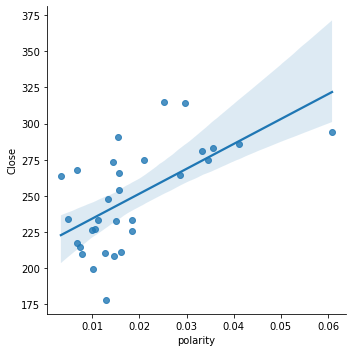

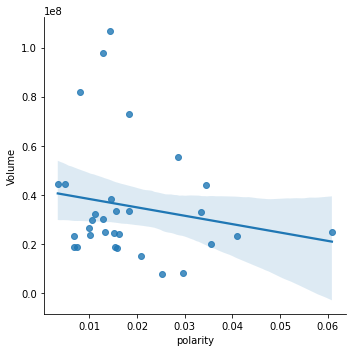

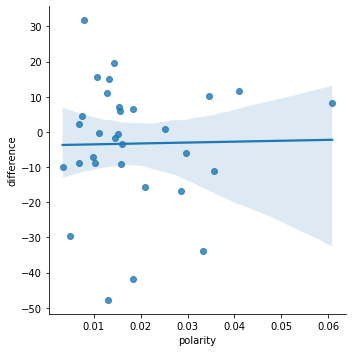

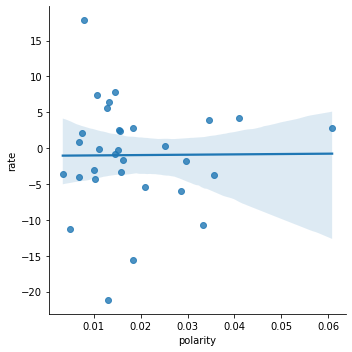

In [ ]:
sns.lmplot(data=df_1501, x="polarity", y="Close")
sns.lmplot(data=df_1501, x="polarity", y="Volume")
sns.lmplot(data=df_1501, x="polarity", y="difference")
sns.lmplot(data=df_1501, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1501).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     17.26
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           0.000263
Time:                        09:08:12   Log-Likelihood:                -146.68
No. Observations:                  31   AIC:                             297.4
Df Residuals:                      29   BIC:                             300.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.0638      9.181     23.643      0.000     198.287     235.841
polarity    1720.8806    414.239      4.154      0.000     873.667    2568.094
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.443
Skew:                           0.185   Prob(JB):                        0.801
Kurtosis:                       2.545   Cond. No.                         81.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1501).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9343
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.342
Time:                        09:08:29   Log-Likelihood:                -570.00
No. Observations:                  31   AIC:                             1144.
Df Residuals:                      29   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.173e+07   7.82e+06      5.334      0.000    2.57e+07    5.77e+07
polarity   -3.412e+08   3.53e+08     -0.967      0.342   -1.06e+09    3.81e+08
==============================================================================
Omnibus:                       15.919   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.009
Skew:                           1.578   Prob(JB):                     0.000203
Kurtosis:                       4.790   Cond. No.                         81.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1501).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                  0.009661
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.922
Time:                        09:08:30   Log-Likelihood:                -132.34
No. Observations:                  31   AIC:                             268.7
Df Residuals:                      29   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7864      5.781     -0.655      0.518     -15.609       8.037
polarity      25.6373    260.832      0.098      0.922    -507.824     559.098
==============================================================================
Omnibus:                        4.484   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.016
Skew:                          -0.716   Prob(JB):                        0.221
Kurtosis:                       3.532   Cond. No.                         81.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 가격이 하락하거나 상승함과 관계없이 polarity와 Close의 그래프 상 흩어진 정도가 심하고 상관계수의 변동과 관련이 없음 </br> => polarity가 커져서 Close에 영향을 주었다기 보다는 Close가 크기 때문에 polarity도 큰 것으로 보는 것이 합리적인가?


- 가격 하락 때의 polarity와 volume의 관련성이 가격 상승 때보다 낮아짐 </br>
=> "polarity가 커지면/작아지면 가격이 떨어지거나/오름 또는 가격이 오르면/떨어지면 polarity가 작아지거나/커짐"이라고 보기는 어렵다. </br>
=> polarity는 어떤 일정 범위에 대부분 몰려있기 때문에 polarity에 중점을 두기 보다는 volume의 변동성이 심해진 것으로 이해

2016년 1월 Mike Hearn

In [ ]:
lst_1601 = []
for d in df_join.Date:
  if d.startswith('2016-01-'):
    lst_1601.append(d)
df_1601 = df_join[df_join.Date.isin(lst_1601)]
print("2016년 1월")
print("2016년 1월 평균 polarity: ", df_1601.polarity.mean())
print(stats.pearsonr(df_1601.polarity, df_1601.Close))
print(stats.pearsonr(df_1601.polarity, df_1601.Volume))
print(stats.pearsonr(df_1601.polarity, df_1601.difference))

2016년 1월
2016년 1월 평균 polarity:  0.020014337246690207
(0.5616288890480224, 0.0010106297038914838)
(-0.1514751189600234, 0.4159719489964203)
(-0.05600785945303554, 0.7647426446293777)


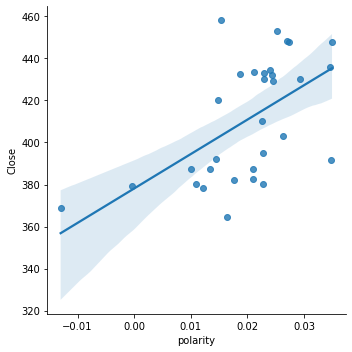

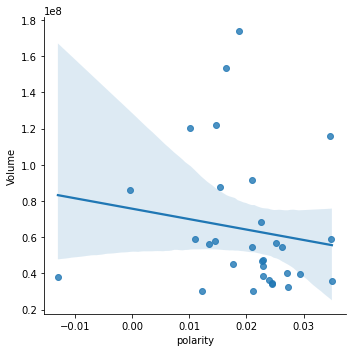

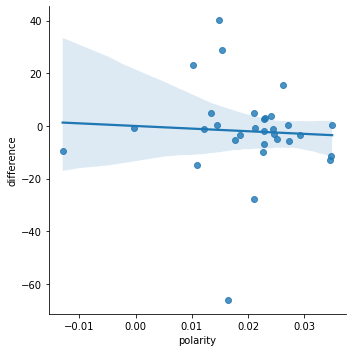

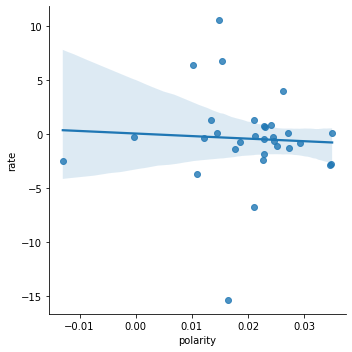

In [ ]:
sns.lmplot(data=df_1601, x="polarity", y="Close")
sns.lmplot(data=df_1601, x="polarity", y="Volume")
sns.lmplot(data=df_1601, x="polarity", y="difference")
sns.lmplot(data=df_1601, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1601).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     13.36
Date:                Fri, 03 Dec 2021   Prob (F-statistic):            0.00101
Time:                        09:09:28   Log-Likelihood:                -141.58
No. Observations:                  31   AIC:                             287.2
Df Residuals:                      29   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.0948      9.949     38.004      0.000     357.747     398.442
polarity    1636.3088    447.638      3.655      0.001     720.787    2551.831
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.455
Skew:                           0.016   Prob(JB):                        0.796
Kurtosis:                       2.407   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1601).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6810
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.416
Time:                        09:09:38   Log-Likelihood:                -583.62
No. Observations:                  31   AIC:                             1171.
Df Residuals:                      29   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.575e+07   1.55e+07      4.885      0.000     4.4e+07    1.07e+08
polarity   -5.758e+08   6.98e+08     -0.825      0.416      -2e+09    8.51e+08
==============================================================================
Omnibus:                       13.672   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.493
Skew:                           1.453   Prob(JB):                      0.00118
Kurtosis:                       4.414   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1601).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                   0.09126
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.765
Time:                        09:09:38   Log-Likelihood:                -132.13
No. Observations:                  31   AIC:                             268.3
Df Residuals:                      29   BIC:                             271.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      7.333      0.000      1.000     -14.997      14.999
polarity     -99.6732    329.950     -0.302      0.765    -774.497     575.151
==============================================================================
Omnibus:                       17.955   Durbin-Watson:                   2.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.006
Skew:                          -1.068   Prob(JB):                     2.05e-09
Kurtosis:                       8.139   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#2017년 1월 비교
lst_1701 = []
for d in df_join.Date:
  if d.startswith('2017-01-'):
    lst_1701.append(d)
df_1701 = df_join[df_join.Date.isin(lst_1701)]
print("2017년 1월")
print("2017년 1월 평균 polarity: ", df_1701.polarity.mean())
print(stats.pearsonr(df_1701.polarity, df_1701.Close))
print(stats.pearsonr(df_1701.polarity, df_1701.Volume))
print(stats.pearsonr(df_1701.polarity, df_1701.difference))

2017년 1월
2017년 1월 평균 polarity:  0.02935291645629435
(0.018445927158836962, 0.9215429908204827)
(-0.23164196507179227, 0.2098908395372061)
(0.053866158222422196, 0.7735011708873832)


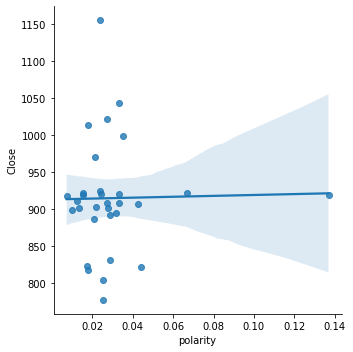

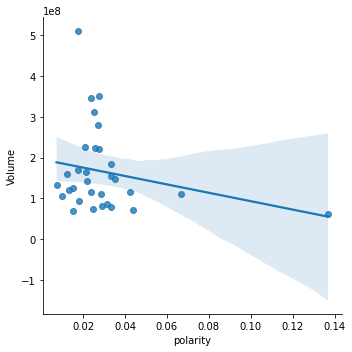

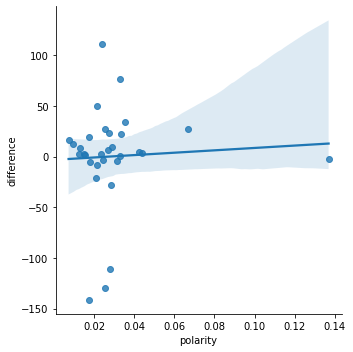

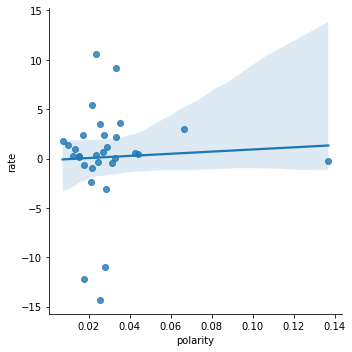

In [ ]:
sns.lmplot(data=df_1701, x="polarity", y="Close")
sns.lmplot(data=df_1701, x="polarity", y="Volume")
sns.lmplot(data=df_1701, x="polarity", y="difference")
sns.lmplot(data=df_1701, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1701).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                  0.009871
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.922
Time:                        09:10:38   Log-Likelihood:                -177.64
No. Observations:                  31   AIC:                             359.3
Df Residuals:                      29   BIC:                             362.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    913.1375     22.630     40.351      0.000     866.855     959.420
polarity      60.5958    609.915      0.099      0.922   -1186.820    1308.011
==============================================================================
Omnibus:                        9.699   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.002
Skew:                           0.932   Prob(JB):                       0.0111
Kurtosis:                       4.870   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1701).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.644
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.210
Time:                        09:10:38   Log-Likelihood:                -614.37
No. Observations:                  31   AIC:                             1233.
Df Residuals:                      29   BIC:                             1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.961e+08   2.97e+07      6.597      0.000    1.35e+08    2.57e+08
polarity   -1.027e+09   8.01e+08     -1.282      0.210   -2.67e+09    6.11e+08
==============================================================================
Omnibus:                       17.533   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.492
Skew:                           1.588   Prob(JB):                     3.55e-05
Kurtosis:                       5.403   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1701).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                   0.08439
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.774
Time:                        09:10:38   Log-Likelihood:                -164.91
No. Observations:                  31   AIC:                             333.8
Df Residuals:                      29   BIC:                             336.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2344     15.008     -0.216      0.831     -33.930      27.461
polarity     117.5081    404.503      0.290      0.774    -709.794     944.810
==============================================================================
Omnibus:                       13.280   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.877
Skew:                          -1.145   Prob(JB):                     0.000588
Kurtosis:                       5.504   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2017년 3월 가격하락

In [ ]:
lst_1703 = []
for d in df_join.Date:
  if d.startswith('2017-03-'):
    lst_1703.append(d)
df_1703 = df_join[df_join.Date.isin(lst_1703)]
print("2017년 3월")
print("2017년 3월 평균 polarity: ", df_1703.polarity.mean())
print(stats.pearsonr(df_1703.polarity, df_1703.Close))
print(stats.pearsonr(df_1703.polarity, df_1703.Volume))
print(stats.pearsonr(df_1703.polarity, df_1703.difference))

2017년 3월
2017년 3월 평균 polarity:  0.04251120028206567
(0.3052339939685261, 0.09496882134815407)
(0.027021047127295417, 0.8852711353434571)
(-0.09914170750218756, 0.5956793306212448)


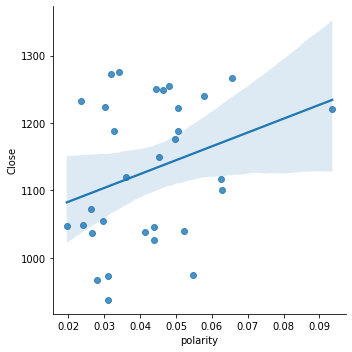

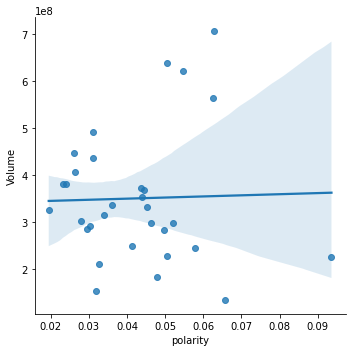

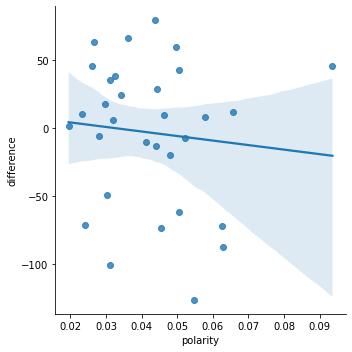

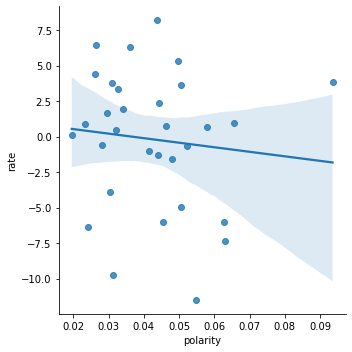

In [ ]:
sns.lmplot(data=df_1703, x="polarity", y="Close")
sns.lmplot(data=df_1703, x="polarity", y="Volume")
sns.lmplot(data=df_1703, x="polarity", y="difference")
sns.lmplot(data=df_1703, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1703).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.979
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0950
Time:                        09:11:44   Log-Likelihood:                -186.74
No. Observations:                  31   AIC:                             377.5
Df Residuals:                      29   BIC:                             380.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1041.9973     53.913     19.327      0.000     931.733    1152.262
polarity    2055.1734   1190.639      1.726      0.095    -379.956    4490.303
==============================================================================
Omnibus:                        4.848   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                1.736
Skew:                           0.002   Prob(JB):                        0.420
Kurtosis:                       1.841   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1703).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.02119
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.885
Time:                        09:11:45   Log-Likelihood:                -624.64
No. Observations:                  31   AIC:                             1253.
Df Residuals:                      29   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.407e+08   7.35e+07      4.633      0.000     1.9e+08    4.91e+08
polarity    2.364e+08   1.62e+09      0.146      0.885   -3.09e+09    3.56e+09
==============================================================================
Omnibus:                        5.034   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.783
Skew:                           0.842   Prob(JB):                        0.151
Kurtosis:                       3.301   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1703).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.2879
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.596
Time:                        09:11:45   Log-Likelihood:                -166.55
No. Observations:                  31   AIC:                             337.1
Df Residuals:                      29   BIC:                             340.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6697     28.110      0.380      0.707     -46.821      68.160
polarity    -333.0734    620.783     -0.537      0.596   -1602.717     936.570
==============================================================================
Omnibus:                        2.165   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.963
Skew:                          -0.549   Prob(JB):                        0.375
Kurtosis:                       2.437   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2017년 6월 미국 금리 인상

In [ ]:
lst_1706 = []
for d in df_join.Date:
  if d.startswith('2017-06-'):
    lst_1706.append(d)
df_1706 = df_join[df_join.Date.isin(lst_1706)]
print("2017년 6월")
print("2017년 6월 평균 polarity: ", df_1706.polarity.mean())
print(stats.pearsonr(df_1706.polarity, df_1706.Close))
print(stats.pearsonr(df_1706.polarity, df_1706.Volume))
print(stats.pearsonr(df_1706.polarity, df_1706.difference))

2017년 6월
2017년 6월 평균 polarity:  0.044881409200393664
(0.09197477592259619, 0.6288205886356271)
(0.2939618748581447, 0.11485408400677767)
(0.11980927197697633, 0.5282913470215462)


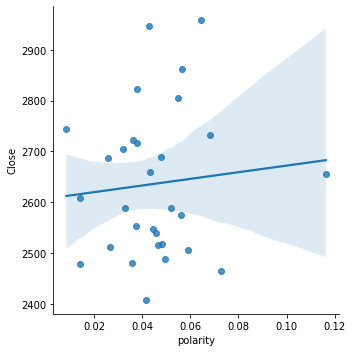

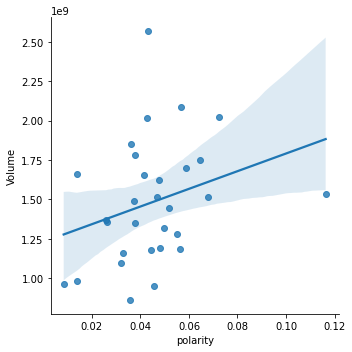

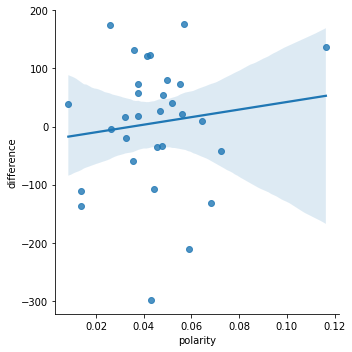

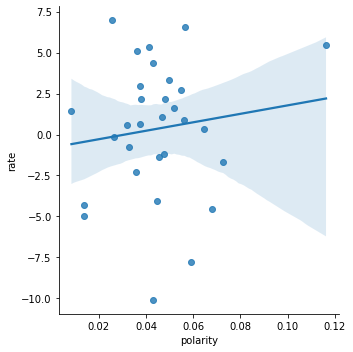

In [ ]:
sns.lmplot(data=df_1706, x="polarity", y="Close")
sns.lmplot(data=df_1706, x="polarity", y="Volume")
sns.lmplot(data=df_1706, x="polarity", y="difference")
sns.lmplot(data=df_1706, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1706).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.2389
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.629
Time:                        09:12:26   Log-Likelihood:                -191.20
No. Observations:                  30   AIC:                             386.4
Df Residuals:                      28   BIC:                             389.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2606.9034     65.666     39.700      0.000    2472.393    2741.414
polarity     652.8524   1335.742      0.489      0.629   -2083.291    3388.995
==============================================================================
Omnibus:                        2.215   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.996
Skew:                           0.576   Prob(JB):                        0.369
Kurtosis:                       2.481   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1706).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.648
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.115
Time:                        09:12:27   Log-Likelihood:                -634.08
No. Observations:                  30   AIC:                             1272.
Df Residuals:                      28   BIC:                             1275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.231e+09   1.69e+08      7.269      0.000    8.84e+08    1.58e+09
polarity    5.606e+09   3.44e+09      1.627      0.115   -1.45e+09    1.27e+10
==============================================================================
Omnibus:                        5.965   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.281
Skew:                           0.854   Prob(JB):                        0.118
Kurtosis:                       3.713   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1706).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.4078
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.528
Time:                        09:12:27   Log-Likelihood:                -183.10
No. Observations:                  30   AIC:                             370.2
Df Residuals:                      28   BIC:                             373.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.7454     50.132     -0.454      0.654    -125.436      79.946
polarity     651.1915   1019.764      0.639      0.528   -1437.701    2740.084
==============================================================================
Omnibus:                        5.170   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.589
Skew:                          -0.794   Prob(JB):                        0.166
Kurtosis:                       3.590   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2017년 11월, 12월 급증

In [ ]:
lst_1711 = []
for d in df_join.Date:
  if d.startswith('2017-11-' or '2017-12'):
    lst_1711.append(d)
df_1711 = df_join[df_join.Date.isin(lst_1711)]
print("2017년 11월, 12월")
print("2017년 11월, 12월 평균 polarity: ", df_1711.polarity.mean())
print(stats.pearsonr(df_1711.polarity, df_1711.Close))
print(stats.pearsonr(df_1711.polarity, df_1711.Volume))
print(stats.pearsonr(df_1711.polarity, df_1711.difference))

2017년 11월, 12월
2017년 11월, 12월 평균 polarity:  0.0689220810413009
(0.6126216802143188, 0.0003199443202631047)
(0.18375257862164196, 0.331051312853327)
(0.2162698381041551, 0.25102079393553456)


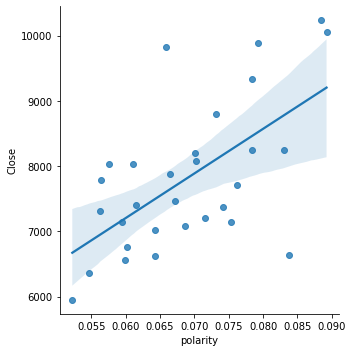

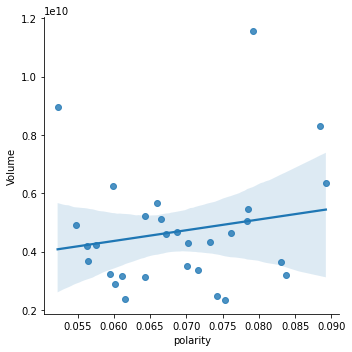

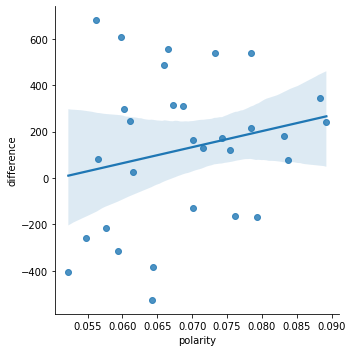

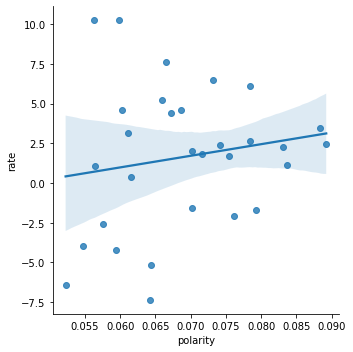

In [ ]:
sns.lmplot(data=df_1711, x="polarity", y="Close")
sns.lmplot(data=df_1711, x="polarity", y="Volume")
sns.lmplot(data=df_1711, x="polarity", y="difference")
sns.lmplot(data=df_1711, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1711).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     16.82
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           0.000320
Time:                        09:13:04   Log-Likelihood:                -246.06
No. Observations:                  30   AIC:                             496.1
Df Residuals:                      28   BIC:                             498.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3095.9016   1162.175      2.664      0.013     715.293    5476.510
polarity    6.844e+04   1.67e+04      4.101      0.000    3.43e+04    1.03e+05
==============================================================================
Omnibus:                        0.818   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.186
Skew:                           0.153   Prob(JB):                        0.911
Kurtosis:                       3.235   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1711).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9785
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.331
Time:                        09:13:05   Log-Likelihood:                -684.61
No. Observations:                  30   AIC:                             1373.
Df Residuals:                      28   BIC:                             1376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.153e+09   2.59e+09      0.830      0.414   -3.16e+09    7.46e+09
polarity    3.683e+10   3.72e+10      0.989      0.331   -3.94e+10    1.13e+11
==============================================================================
Omnibus:                       17.665   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.283
Skew:                           1.560   Prob(JB):                     2.39e-05
Kurtosis:                       5.701   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1711).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.374
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.251
Time:                        09:13:05   Log-Likelihood:                -214.88
No. Observations:                  30   AIC:                             433.8
Df Residuals:                      28   BIC:                             436.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -351.2692    411.017     -0.855      0.400   -1193.199     490.660
polarity    6917.6074   5901.728      1.172      0.251   -5171.534     1.9e+04
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.618
Skew:                           0.088   Prob(JB):                        0.734
Kurtosis:                       2.319   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2018년 3월 유지

In [ ]:
lst_1803 = []
for d in df_join.Date:
  if d.startswith('2018-03-'):
    lst_1803.append(d)
df_1803 = df_join[df_join.Date.isin(lst_1803)]
print("2018년 3월")
print("2018년 3월 polarity: ", df_1803.polarity.mean())
print(stats.pearsonr(df_1803.polarity, df_1803.Close))
print(stats.pearsonr(df_1803.polarity, df_1803.Volume))
print(stats.pearsonr(df_1803.polarity, df_1803.difference))

2018년 3월
2018년 3월 polarity:  0.04687427806646898
(0.3843797008259172, 0.032762685352621154)
(0.3681737437801746, 0.041562150878017685)
(0.17931981924482343, 0.33442670821160836)


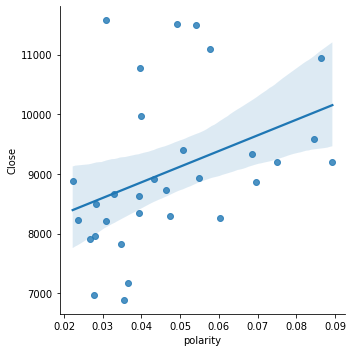

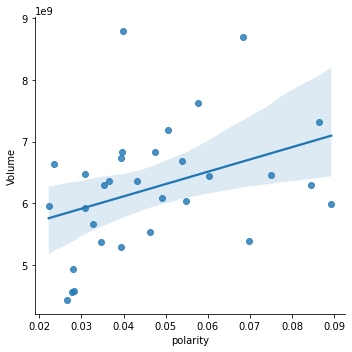

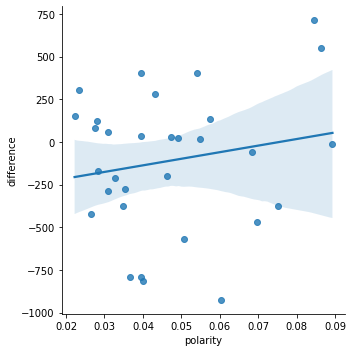

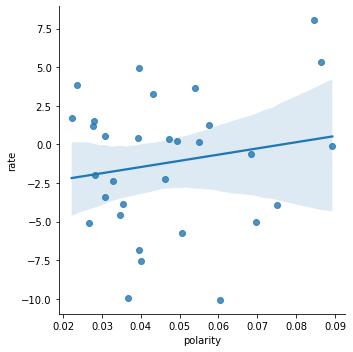

In [ ]:
sns.lmplot(data=df_1803, x="polarity", y="Close")
sns.lmplot(data=df_1803, x="polarity", y="Volume")
sns.lmplot(data=df_1803, x="polarity", y="difference")
sns.lmplot(data=df_1803, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1803).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     5.027
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0328
Time:                        09:14:39   Log-Likelihood:                -263.33
No. Observations:                  31   AIC:                             530.7
Df Residuals:                      29   BIC:                             533.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7811.3563    590.570     13.227      0.000    6603.506    9019.207
polarity    2.622e+04   1.17e+04      2.242      0.033    2303.697    5.01e+04
==============================================================================
Omnibus:                        5.375   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.361
Skew:                           0.916   Prob(JB):                        0.113
Kurtosis:                       3.135   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1803).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.547
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0416
Time:                        09:14:40   Log-Likelihood:                -684.74
No. Observations:                  31   AIC:                             1373.
Df Residuals:                      29   BIC:                             1376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.313e+09   4.73e+08     11.230      0.000    4.35e+09    6.28e+09
polarity    1.998e+10   9.37e+09      2.132      0.042    8.17e+08    3.91e+10
==============================================================================
Omnibus:                        4.294   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                2.827
Skew:                           0.686   Prob(JB):                        0.243
Kurtosis:                       3.552   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1803).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9635
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.334
Time:                        09:14:40   Log-Likelihood:                -229.53
No. Observations:                  31   AIC:                             463.1
Df Residuals:                      29   BIC:                             465.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -291.3075    198.474     -1.468      0.153    -697.232     114.617
polarity    3858.0629   3930.473      0.982      0.334   -4180.656    1.19e+04
==============================================================================
Omnibus:                        1.467   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.329
Skew:                          -0.376   Prob(JB):                        0.515
Kurtosis:                       2.319   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2018년 10월, 11월 폭락

In [ ]:
lst_1810 = []
for d in df_join.Date:
  if d.startswith('2018-10-' or '2018-11-'):
    lst_1810.append(d)
df_1810 = df_join[df_join.Date.isin(lst_1810)]
print("2018년 10월, 11월")
print("2018년 10월, 11월 polarity: ", df_1810.polarity.mean())
print(stats.pearsonr(df_1810.polarity, df_1810.Close))
print(stats.pearsonr(df_1810.polarity, df_1810.Volume))
print(stats.pearsonr(df_1810.polarity, df_1810.difference))

2018년 10월, 11월
2018년 10월, 11월 polarity:  0.035161471244606134
(0.292607725569127, 0.1101748772819285)
(0.20150913215991254, 0.27701540042581424)
(0.04177216189383278, 0.8234443453495516)


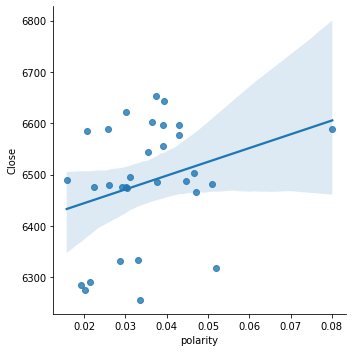

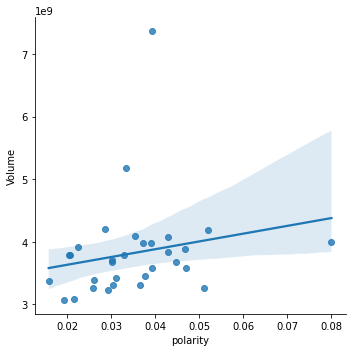

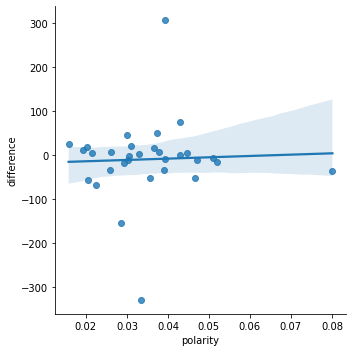

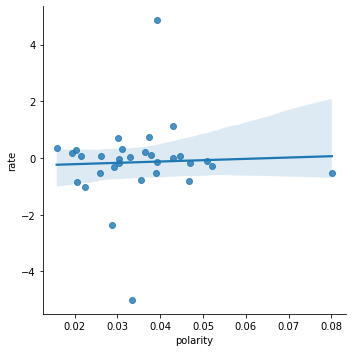

In [ ]:
sns.lmplot(data=df_1810, x="polarity", y="Close")
sns.lmplot(data=df_1810, x="polarity", y="Volume")
sns.lmplot(data=df_1810, x="polarity", y="difference")
sns.lmplot(data=df_1810, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1810).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.715
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.110
Time:                        09:15:26   Log-Likelihood:                -189.62
No. Observations:                  31   AIC:                             383.2
Df Residuals:                      29   BIC:                             386.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6390.7950     60.758    105.184      0.000    6266.530    6515.060
polarity    2682.5891   1627.919      1.648      0.110    -646.880    6012.058
==============================================================================
Omnibus:                        2.270   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.898
Skew:                          -0.478   Prob(JB):                        0.387
Kurtosis:                       2.255   Cond. No.                         80.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1810).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.227
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.277
Time:                        09:15:27   Log-Likelihood:                -677.72
No. Observations:                  31   AIC:                             1359.
Df Residuals:                      29   BIC:                             1362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.384e+09   4.18e+08      8.087      0.000    2.53e+09    4.24e+09
polarity    1.242e+10   1.12e+10      1.108      0.277   -1.05e+10    3.53e+10
==============================================================================
Omnibus:                       49.160   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.668
Skew:                           3.297   Prob(JB):                     2.24e-55
Kurtosis:                      15.303   Cond. No.                         80.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1810).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.05069
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.823
Time:                        09:15:27   Log-Likelihood:                -183.52
No. Observations:                  31   AIC:                             371.0
Df Residuals:                      29   BIC:                             373.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.5190     49.904     -0.411      0.684    -122.584      81.546
polarity     301.0426   1337.097      0.225      0.823   -2433.627    3035.712
==============================================================================
Omnibus:                       14.908   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               64.738
Skew:                          -0.159   Prob(JB):                     8.76e-15
Kurtosis:                      10.072   Cond. No.                         80.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2019년 4월, 5월 급등

In [ ]:
lst_1904 = []
for d in df_join.Date:
  if d.startswith('2019-04-' or '2019-05-'):
    lst_1904.append(d)
df_1904 = df_join[df_join.Date.isin(lst_1904)]
print("2019년 4월, 5월")
print("2019년 4월, 5월 polarity: ", df_1904.polarity.mean())
print(stats.pearsonr(df_1904.polarity, df_1904.Close))
print(stats.pearsonr(df_1904.polarity, df_1904.Volume))
print(stats.pearsonr(df_1904.polarity, df_1904.difference))

2019년 4월, 5월
2019년 4월, 5월 polarity:  0.06673930064937186
(0.3597084338931579, 0.05089074174421353)
(-0.025570133670915995, 0.8933045379517123)
(-0.06505849348415793, 0.7326814736244152)


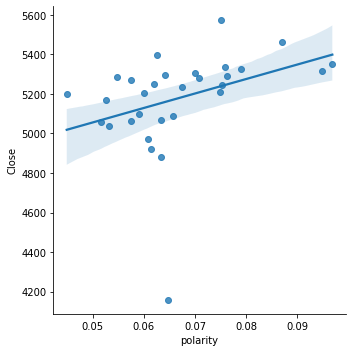

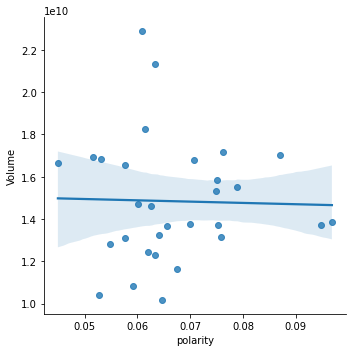

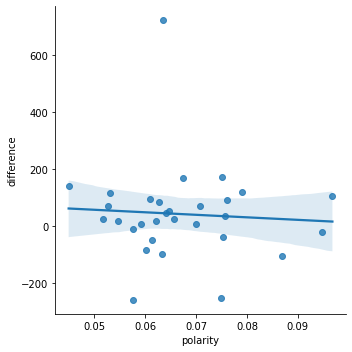

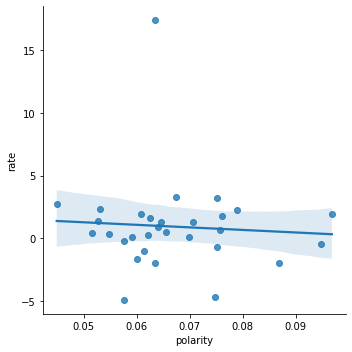

In [ ]:
sns.lmplot(data=df_1904, x="polarity", y="Close")
sns.lmplot(data=df_1904, x="polarity", y="Volume")
sns.lmplot(data=df_1904, x="polarity", y="difference")
sns.lmplot(data=df_1904, x="polarity", y="rate")

In [ ]:
res = ols('Close ~ polarity', data=df_1904).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     4.161
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0509
Time:                        09:17:00   Log-Likelihood:                -205.36
No. Observations:                  30   AIC:                             414.7
Df Residuals:                      28   BIC:                             417.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4689.2100    243.657     19.245      0.000    4190.102    5188.318
polarity    7330.9041   3593.682      2.040      0.051     -30.421    1.47e+04
==============================================================================
Omnibus:                       41.370   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.650
Skew:                          -2.758   Prob(JB):                     1.07e-36
Kurtosis:                      13.104   Cond. No.                         84.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('Volume ~ polarity', data=df_1904).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.01832
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.893
Time:                        09:16:14   Log-Likelihood:                -695.93
No. Observations:                  30   AIC:                             1396.
Df Residuals:                      28   BIC:                             1399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.526e+10   3.08e+09      4.954      0.000    8.95e+09    2.16e+10
polarity   -6.147e+09   4.54e+10     -0.135      0.893   -9.92e+10    8.69e+10
==============================================================================
Omnibus:                        4.931   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.300
Skew:                           0.736   Prob(JB):                        0.192
Kurtosis:                       3.689   Cond. No.                         84.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
res = ols('difference ~ polarity', data=df_1904).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.1190
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.733
Time:                        09:16:14   Log-Likelihood:                -195.23
No. Observations:                  30   AIC:                             394.5
Df Residuals:                      28   BIC:                             397.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.5422    173.835      0.578      0.568    -255.542     456.627
polarity    -884.5084   2563.881     -0.345      0.733   -6136.381    4367.364
==============================================================================
Omnibus:                       31.333   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.021
Skew:                           1.990   Prob(JB):                     1.91e-22
Kurtosis:                      11.011   Cond. No.                         84.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

volume과 관련성 높음 -> 그래프로 확인

In [ ]:
s_volume = raw.Volume
s_volume.index = raw.Date
s_volume

Date
2014-09-17    2.105680e+07
2014-09-18    3.448320e+07
2014-09-19    3.791970e+07
2014-09-20    3.686360e+07
2014-09-21    2.658010e+07
                  ...     
2019-11-19    2.108361e+10
2019-11-20    2.076430e+10
2019-11-21    2.251424e+10
2019-11-22    3.424232e+10
2019-11-23    2.100892e+10
Name: Volume, Length: 1894, dtype: float64

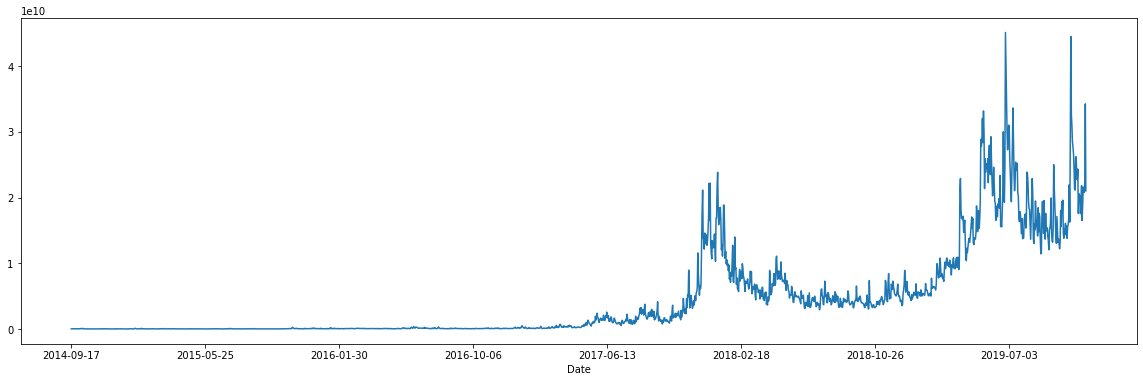

In [ ]:
s_volume.plot()
plt.show()

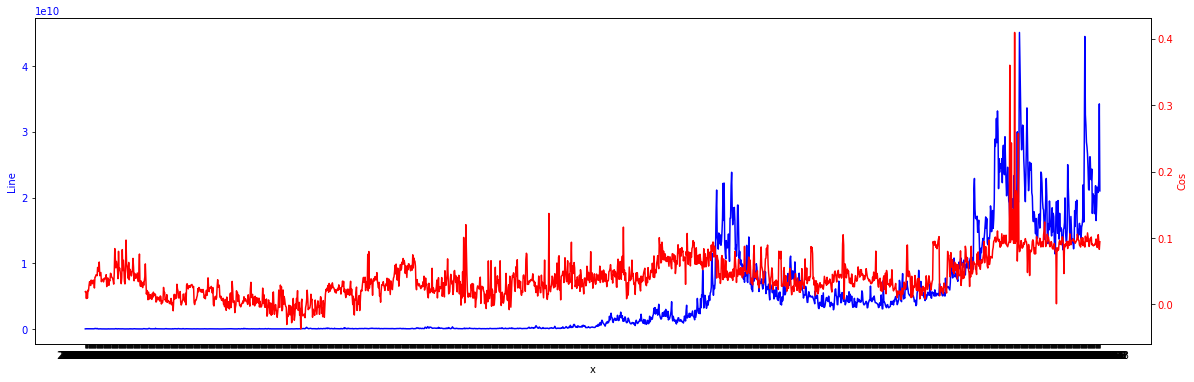

In [ ]:
fig = plt.figure(figsize=(20,6)) ## 캔버스 생성
#fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'b'
ax1.plot(s_volume, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(df_smt_ext['polarity'], color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
 
plt.show()

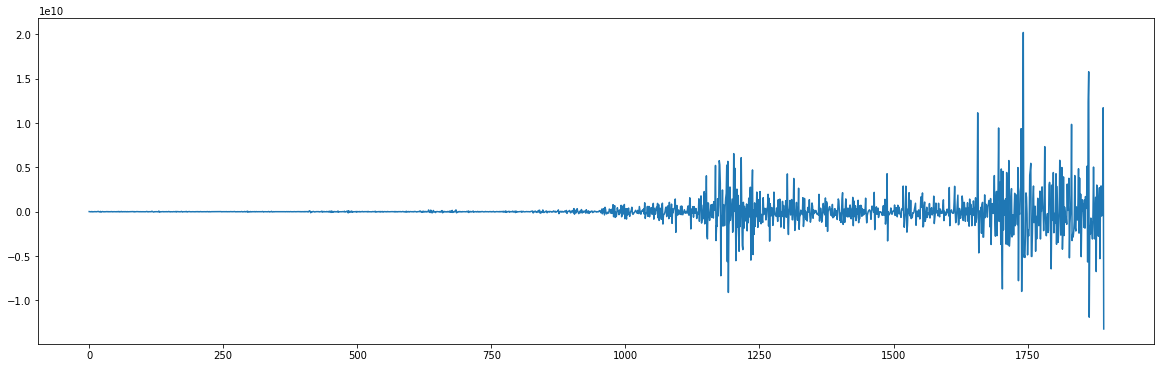

In [ ]:
diff_vol_1 = np.diff(s_volume)
plt.plot(diff_vol_1)
plt.show()

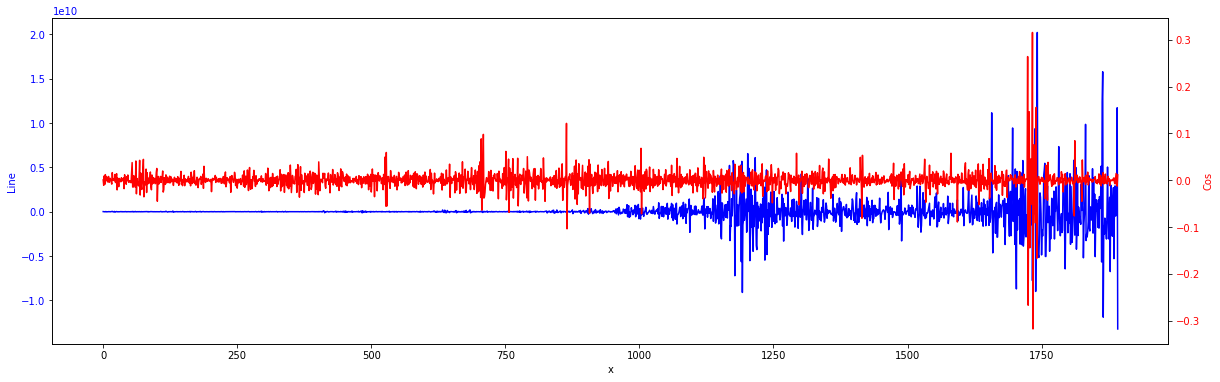

In [ ]:
fig = plt.figure(figsize=(20,6)) ## 캔버스 생성
#fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'b'
ax1.plot(diff_vol_1, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(diff_smt_1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
 
plt.show()

AR, MA 모형 중 선택

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#plot_acf(train_df)
#plot_pacf(train_df)
#plt.show()

=> ACF가 연속적, PACF가 절단면을 가지므로 AR

ARIMA 적용

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.api as sm

In [ ]:
#model = ARIMA(train_df, order = (1,1,0))
##model_fit = model.fit(trend = 'c', full_output = True, disp = True)
#model_fit = model.fit()
#print(model_fit.summary())

=> AIC 줄일 수 있는 방법? 자동으로 적합한 파라미터 찾기

적합한 ARIMA 파라미터 찾기

In [ ]:
#적합한 모델 자동으로 찾아주는 라이브러리
#!pip install pmdarima --user

In [ ]:
#from pmdarima.arima import auto_arima

#model_arima= auto_arima(train_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=10,max_q=10,
#                        suppress_warnings=True,stepwise=False,seasonal=False,approximation=False)
#model_arima.fit(train_df)

In [ ]:
#model = ARIMA(train_df, order=(2,1,2))
##model_fit = model.fit(trend='c', full_output=True, disp=1)
#model_fit = model.fit()
#print(model_fit.summary())

In [ ]:
#const는 유효하지 않음 -> trend='nc'
#model = ARIMA(train_df, order=(2,1,2))
#model_fit = model.fit(trend='nc', full_output=True, disp=1)
#print(model_fit.summary())

잔차 확인

In [ ]:
#from pandas import DataFrame
#from matplotlib import pyplot

#residuals = DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()

In [ ]:
#순서대로 stderr, upper bound, lower bound
#fore = model_fit.forecast(steps=5)
#fore